## Dependecies

In [1271]:
import pandas as pd

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [1273]:
# pip install --upgrade openpyxl

## DATABASE


In [1055]:
# portfolio_df = pd.read_excel("Industry_Portfolios.xlsx").set_index('Date')  
portfolio_df = pd.read_excel(
    "Industry_Portfolios.xlsx",
    index_col=0,
    parse_dates=True,
    date_format="%Y%m"  # Use the appropriate date format
)


market_df = pd.read_excel(
    "Market_Portfolio.xlsx",
    index_col=0,
    parse_dates=True,
    date_format="%Y%m"  # Use the appropriate date format
)


# risk_df = pd.read_excel("Risk_Factors.xlsx").set_index('Date')
risk_df = pd.read_excel(
    "Risk_Factors.xlsx",
    index_col=0,
    parse_dates=True,
    date_format="%Y%m"  # Use the appropriate date format
)

# <font color=green> MEAN VARIANCE ANALYSIS - EFFICIENT FRONTIER (HW1)

Industry_Portfolios.xlsx contains monthly nominal (net) returns (expressed as percentages) for ten industry portfolios, over the ten-year period from Jan 2004 through Dec 2013.

Use these returns to estimate the vector of mean returns and the covariance matrix of returns for the ten industry portfolios:

* Create a table showing the mean return and standard deviation of return for the ten industry portfolios.

* Plot the minimum-variance frontier (without the riskless asset) generated by the ten industry portfolios:

> This graph must have expected (monthly) return on the vertical axis vs standard deviation of (monthly) return on the horizontal axis.

> This graph must cover the range from 0% to 2% on the vertical axis, in increments of 0.1% (or less).

* Briefly explain (in words, without mathematical equations or formulas) the economic significance and relevance of the minimum-variance frontier to an investor.

### import data

In [128]:
portfolio_df = pd.read_excel(
    "Industry_Portfolios.xlsx",
    index_col=0,
    parse_dates=True,
    date_format="%Y%m"  # Use the appropriate date format
)

portfolio_df

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
2004-01-01,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
2004-02-01,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
2004-03-01,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
2004-04-01,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
2004-05-01,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...
2013-08-01,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
2013-09-01,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
2013-10-01,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


In [130]:
# df = pd.read_excel("Industry_Portfolios.xlsx", index_col=0, parse_dates= True)
# #df = df.set_index('Date')   
# df

### 1.1 table showing the `mean return` and `standard deviation of return` for the ten industry portfolios.

In [69]:
def industry_return_std(df):
    mean_return = df.mean()
    std_return = df.std()

    summary_df = pd.DataFrame({
                            'Industry': mean_return.index,
                            'Mean Return': mean_return.values,
                            'Std Deviation': std_return.values})
    return summary_df

In [132]:
industry_returns = industry_return_std(portfolio_df)
industry_returns

### save the file into csv:
#industry_returns.to_csv('industry_summary.csv', index=False)

,Industry,Mean Return,Std Deviation
0,NoDur,0.902833,3.345657
1,Durbl,0.733333,8.361852
2,Manuf,1.012833,5.310270
3,Enrgy,1.231167,6.081524
4,HiTec,0.766250,5.381191
5,Telcm,0.881417,4.448284
6,Shops,0.916333,4.093786
7,Hlth,0.783833,3.787172
8,Utils,0.907167,3.701763
9,Other,0.489083,5.582452


### 1.2 Plot the `minimum-variance frontier` (without the riskless asset) generated by the ten industry portfolios:

> This graph must have expected (monthly) return on the vertical axis vs standard deviation of (monthly) return on the horizontal axis.
> This graph must cover the range from 0% to 2% on the vertical axis, in increments of 0.1% (or less).

In [35]:
# y0, yt, increment are for the vertical axis 
def risky_mvf(portfolio_data, y0, yt, increment):
    
    # V is nxn covariance matrix, V_inv = V^-1
    V = portfolio_data.cov()
    V_inv = np.linalg.inv(V)


    # R = (R1, .., Rn)' nx1 vector of expected returns
    mean_return = portfolio_data.mean()
    R = np.array(mean_return)

    # e = (1, ...1) is nx1 unit vector 
    e = np.ones(len(mean_return))

    # Calculate alpha, zeta, and delta
    # alpha = R' (transpose of R) x V^-1 (inverse of V) x e
    # zeta = R' x V^-1 x R
    # delta = e' x V^-1 x e

    alpha = R.T @ V_inv @ e
    zeta = R.T @ V_inv @ R
    delta = e.T @ V_inv @ e

    # Rmv (global minimum-variance portfolio) = alpha / delta
    Rmv = alpha / delta

    # Rp --> Portfolio  must have mean return of Rp
    Rp = np.arange(y0, yt+increment, increment) #from 0 to 2 with increment of 0.01

    # Variance (sigma square of p)
    # To perform exponentiation in Python, you should use ** instead of ^
    # formula from slides 13
    variance_p = 1 / delta + delta / (zeta * delta - alpha**2) * (Rp - Rmv)**2
    sigma_p = np.sqrt(variance_p)

    risky_minimum_frontier_df = pd.DataFrame({
                        'Rp': Rp,
                        'Sigma_p' : sigma_p
                        })

    return risky_minimum_frontier_df
   

In [135]:
# minimum_variance_frontier(portfolio_data, y0, yt, increment)
mvf1 = risky_mvf(portfolio_df, 0, 2, 0.01)
mvf1

,Rp,Sigma_p
0,0.00,4.968659
1,0.01,4.933815
2,0.02,4.899075
3,0.03,4.864441
4,0.04,4.829918
...,...,...
196,1.96,4.802074
197,1.97,4.836508
198,1.98,4.871053
199,1.99,4.905706


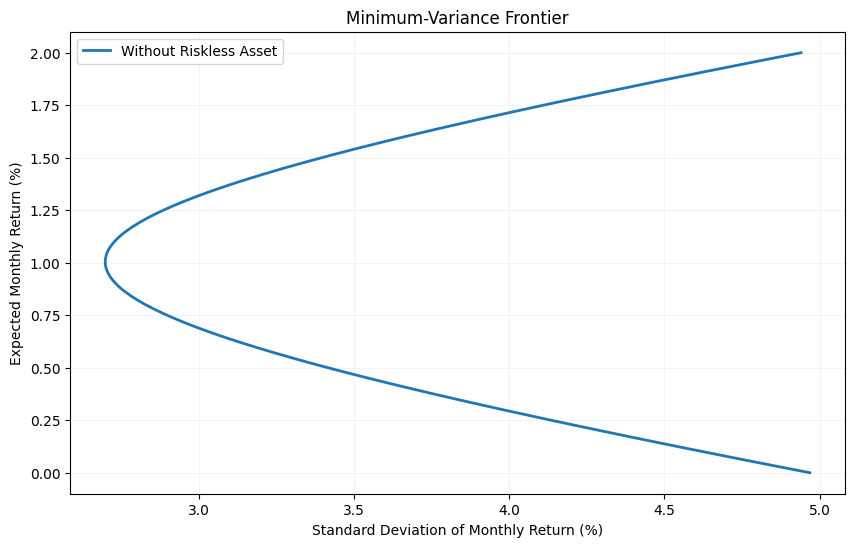

In [79]:
def plot_risky_mvf(mvf_df):

    plt.figure(figsize = (10,6))
    plt.plot(mvf_df['Sigma_p'], mvf_df['Rp'], label= "Without Riskless Asset", linewidth=2)
    
    plt.xlabel('Standard Deviation of Monthly Return (%)')
    plt.ylabel('Expected Monthly Return (%)')
    plt.title('Minimum-Variance Frontier')
    
    plt.grid(linestyle='-', linewidth=0.5, alpha=0.2)
    plt.legend()

    plt.savefig('riskymvf.png') 
    
    plt.show()

#run the code
plot_risky_mvf(mvf1)

### 1.3 Efficient Frontier with riskless asset

> Now suppose that the (net) risk-free rate is 0.13% per month:

* Plot the efficient frontier (with the riskless asset) on the same graph as the minimum-variance frontier generated by the ten industry portfolios.
* Briefly explain the economic significance and relevance of the efficient frontier to an investor.

In [653]:
# y0, yt, increment are for the vertical axis 

def riskless_mvf(portfolio_data, Rf, y0, yt, increment):
    
    # V is nxn covariance matrix, V_inv = V^-1
    V = portfolio_data.cov()
    V_inv = np.linalg.inv(V)


    # R = (R1, .., Rn)' nx1 vector of expected returns
    std_return = portfolio_data.std()
    mean_return = portfolio_data.mean()
    R = np.array(mean_return)

    # e = (1, ...1) is nx1 unit vector 
    e = np.ones(len(mean_return))

    # Calculate alpha, zeta, and delta
    # alpha = R' (transpose of R) x V^-1 (inverse of V) x e
    # zeta = R' x V^-1 x R
    # delta = e' x V^-1 x e

    alpha = R.T @ V_inv @ e
    zeta = R.T @ V_inv @ R
    delta = e.T @ V_inv @ e

    # Rmv (global minimum-variance portfolio) = alpha / delta
    Rmv = alpha / delta

    # Rp --> Portfolio  must have mean return of Rp
    Rp = np.arange(y0, yt+increment, increment) #from 0 to 2 with increment of 0.01
    Rp_riskless = Rp[Rp>Rf]
    
    # Variance (sigma square of p)
    # To perform exponentiation in Python, you should use ** instead of ^
    # variance with riskless asset
    variance_riskless = (Rp_riskless-Rf)**2 / (zeta - 2 * alpha * Rf + delta * Rf**2)
    
    sigma_p_riskless = np.sqrt(variance_riskless)

    riskless_frontier_df = pd.DataFrame({
                        'Rp Riskless': Rp_riskless,
                        'Sigma_p Riskless' : sigma_p_riskless
                        })

    
    # Tangency portfolio
    # Rtg (Tangency Portfolio) = ( alpha x Rf - zeta) / (delta x Rf - alpha)
    Rtg = (alpha * Rf - zeta)/(delta * Rf - alpha)

    # Risk premium for tangency portfolio
    risk_premium = Rtg - Rf
    
    # Standard dev of return for tangency portfolio (L2 slides 29)
    std_tg = -((zeta - 2 * alpha* Rf + delta * Rf **2)**0.5) / (delta * (Rf - Rmv))

    # CAL or sharpe ratio
    sharpe_ratio = (Rtg - Rf) / std_tg

    # Langrange Multuplier
    lmbd = (R - Rf) / (zeta - 2 * alpha * Rf + delta * Rf **2)
    
    # Calculate w (Weights of tangency portfolio)
    w = lmbd * V_inv @ (Rtg - Rf*e)

   
    tangency_portfolio_df = pd.DataFrame({
                            'Industry': mean_return.index,
                            'Mean Return': mean_return,
                            'Std Deviation': std_return,
                            'Tangency Weight w*' : w})
    tangency_portfolio_df = tangency_portfolio_df.reset_index(drop=True)
    # Save tangency_portfolio_df to a CSV file
    tangency_portfolio_df.to_csv('tangency_portfolio.csv', index=False)

    
    print(f'Sharpe ratio for the tangency portfolio is: {str(sharpe_ratio)}')
    print('Risk premium for tangency portfolio: ', risk_premium)
    print(f'Global Minimum-Variance Portfolio Return (Rmv): {Rmv}')

    # Print values of alpha, zeta, and delta
    print(f'Alpha (α): {alpha}')
    print(f'Zeta (ζ): {zeta}')
    print(f'Delta (δ): {delta}')

    print('Riskless Frontier:')
    display(riskless_frontier_df)
    print('Tangency Portfolio:')
    display(tangency_portfolio_df)

    return riskless_frontier_df, tangency_portfolio_df
   # , tangency_portfolio_df, performance_table

In [175]:
mvf2, tangency_portfolio = riskless_mvf(portfolio_df, 0.13, 0, 2, 0.01)

Sharpe ratio for the tangency portfolio is: 0.40356559934950903
Risk premium for tangency portfolio:  1.3562735358446898
Global Minimum-Variance Portfolio Return (Rmv): 1.0040443340832612
Alpha (α): 0.1379432386993192
Zeta (ζ): 0.196408584644823
Delta (δ): 0.1373875973567121
Riskless Frontier:


,Rp Riskless,Sigma_p Riskless
0,0.14,0.024779
1,0.15,0.049558
2,0.16,0.074337
3,0.17,0.099116
4,0.18,0.123896
...,...,...
182,1.96,4.534579
183,1.97,4.559358
184,1.98,4.584137
185,1.99,4.608916


Tangency Portfolio:


,Industry,Mean Return,Std Deviation,Tangency Weight w*
0,NoDur,0.902833,3.345657,0.567972
1,Durbl,0.733333,8.361852,-0.214073
2,Manuf,1.012833,5.310270,0.714105
3,Enrgy,1.231167,6.081524,0.104087
4,HiTec,0.766250,5.381191,-0.363438
5,Telcm,0.881417,4.448284,-0.095463
6,Shops,0.916333,4.093786,0.991647
7,Hlth,0.783833,3.787172,0.075570
8,Utils,0.907167,3.701763,0.132643
9,Other,0.489083,5.582452,-0.913051


In [177]:
mvf2

,Rp Riskless,Sigma_p Riskless
0,0.14,0.024779
1,0.15,0.049558
2,0.16,0.074337
3,0.17,0.099116
4,0.18,0.123896
...,...,...
182,1.96,4.534579
183,1.97,4.559358
184,1.98,4.584137
185,1.99,4.608916


In [179]:
tangency_portfolio

,Industry,Mean Return,Std Deviation,Tangency Weight w*
0,NoDur,0.902833,3.345657,0.567972
1,Durbl,0.733333,8.361852,-0.214073
2,Manuf,1.012833,5.310270,0.714105
3,Enrgy,1.231167,6.081524,0.104087
4,HiTec,0.766250,5.381191,-0.363438
5,Telcm,0.881417,4.448284,-0.095463
6,Shops,0.916333,4.093786,0.991647
7,Hlth,0.783833,3.787172,0.075570
8,Utils,0.907167,3.701763,0.132643
9,Other,0.489083,5.582452,-0.913051


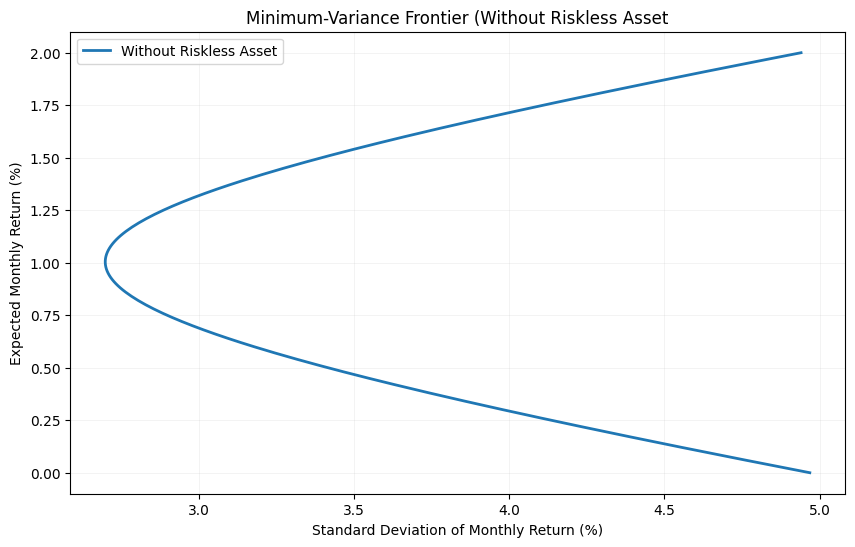

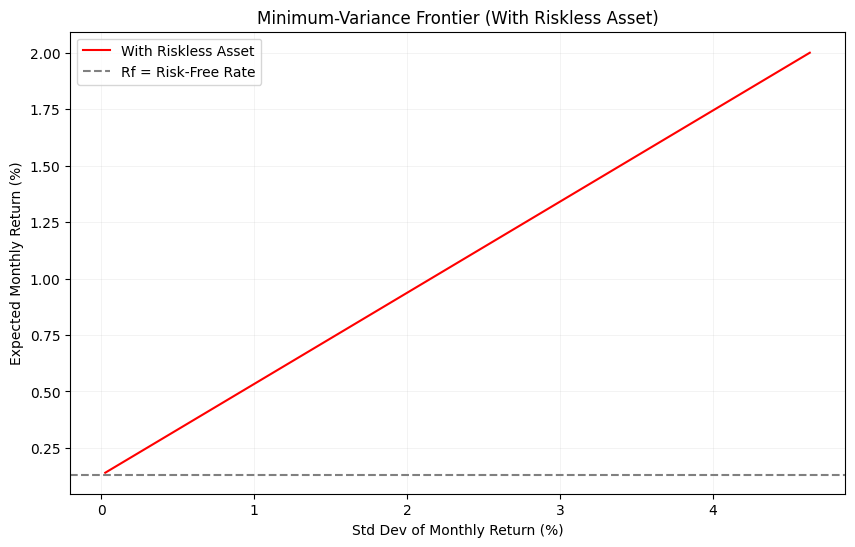

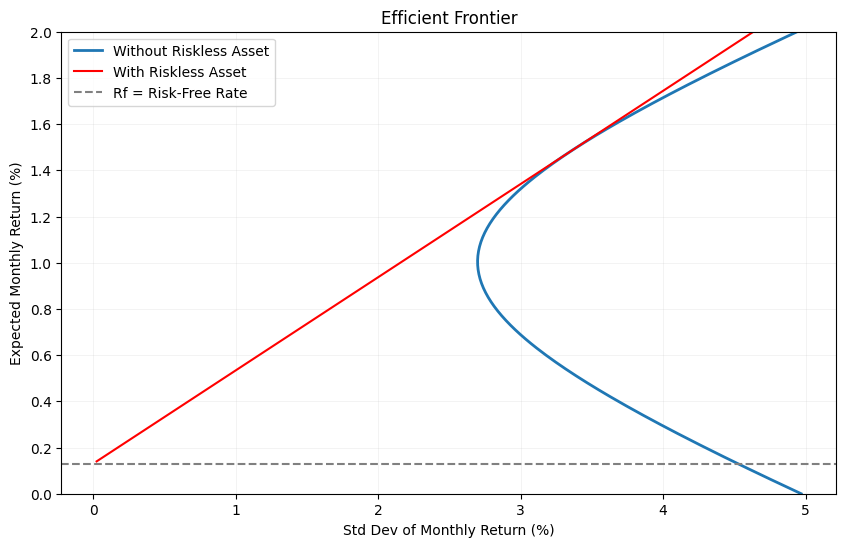

In [143]:
# df1 -- risky
# df2 -- riskless

def plot_all_mvf(df1, df2, Rf):

    # RISKY PLOT
    plt.figure(figsize = (10,6))
    plt.plot(df1['Sigma_p'], df1['Rp'], label= "Without Riskless Asset", linewidth=2)
    plt.xlabel('Standard Deviation of Monthly Return (%)')
    plt.ylabel('Expected Monthly Return (%)')
    plt.title('Minimum-Variance Frontier (Without Riskless Asset')
    plt.grid(linestyle='-', linewidth=0.5, alpha=0.2)
    plt.savefig('risky_mvf.png') 
    plt.legend()
   

    
    # RISKLESS PLOT ONLY
    plt.figure(figsize = (10,6))
    plt.plot(df2['Sigma_p Riskless'],df2['Rp Riskless'], label = "With Riskless Asset", color = 'red')
  
    plt.axhline(y = Rf, color = 'grey', linestyle = '--', label = 'Rf = Risk-Free Rate') 
    plt.grid(linestyle='-', linewidth=0.5, alpha=0.2)
    plt.xlabel('Std Dev of Monthly Return (%)')
    plt.ylabel('Expected Monthly Return (%)')
    plt.title('Minimum-Variance Frontier (With Riskless Asset)')
    plt.savefig('riskless_mvf.png') 
    plt.legend()
    
    # COMBINED PLOT
    plt.figure(figsize = (10,6))
    #1st plot
    plt.plot(df1['Sigma_p'], df1['Rp'], label = "Without Riskless Asset", linewidth =2)
    #2nd plot
    plt.plot(df2['Sigma_p Riskless'],df2['Rp Riskless'], label = "With Riskless Asset", color = 'red')
    #plot Rf
    plt.axhline(y = Rf, color = 'grey', linestyle = '--', label = 'Rf = Risk-Free Rate') 
    
    plt.xlabel('Std Dev of Monthly Return (%)')
    plt.ylabel('Expected Monthly Return (%)')

    plt.yticks(np.arange(0,2.1,0.2))
    plt.ylim(0,2)

    plt.grid(linestyle='-', linewidth=0.5, alpha=0.2)

    plt.title('Efficient Frontier')
    plt.legend()
    plt.savefig('combined_mvf.png') 
    plt.show()

plot_all_mvf(mvf1, mvf2, 0.13)


### 1.4 economic significant and relevance of minimum-variance frontier to an investor

* Minimum-variance frontier represents outermost envelope of attainable portfolios ⇒ **no attainable portfolio exists to the `left` of the minimum-variance frontier**.

* Efficient frontier consists of portfolios with **highest mean return for specified standard deviation of return** ⇒ risk-averse investor will invest in (optimal) portfolio on efficient frontier that maximises expected utility (of wealth).

* `Tangency portfolio` has the **highest possible Sharpe ratio**.

## <font color=blue> 2.2 CARA UTILITY

In [1095]:
#CARA Utility

#W0 -- initial wealth
#b degree of risk aversion

def CARA(portfolio_df, Rf, b, W0):
    
    b_r = b * W0

    # V is nxn covariance matrix, V_inv = V^-1
    V = portfolio_df.cov()
    V_inv = np.linalg.inv(V)
    
    # R = (R1, .., Rn)' nx1 vector of expected returns
    std_return = portfolio_df.std()
    mean_return = portfolio_df.mean()
    R = np.array(mean_return)
    

    # e = (1, ...1) is nx1 unit vector 
    e = np.ones(len(mean_return))

    alpha = R.T @ V_inv @ e
    theta = e.T @ V_inv @ e
    
    weight_CARA = V_inv @ (R - Rf * e) / b_r
    invest_risky = (alpha - theta * Rf) / b
    
    Rp = Rf + weight_CARA.T @ (R - Rf * e)
    utility = -np.exp(-b_r * Rp)
    
    print('Optimal portfolio weights: ', weight_CARA)
    print('Absolute amount of wealth invested in risky assets: ', invest_risky)
    print('Portfolio return: ', Rp)
    print('Utility of final wealth: ', utility)

CARA(portfolio_df, 0.13, 3, 2000)

Optimal portfolio weights:  [ 1.13672864e-05 -4.28440797e-06  1.42919630e-05  2.08318111e-06
 -7.27378194e-06 -1.91058348e-06  1.98466298e-05  1.51244745e-06
  2.65469812e-06 -1.82736240e-05]
Absolute amount of wealth invested in risky assets:  0.04002761701431554
Portfolio return:  0.1300271441988297
Utility of final wealth:  -0.0


In [1067]:
# y0, yt, increment are for the vertical axis 

def riskless_mvf(portfolio_data, Rf, y0, yt, increment):
    
    # V is nxn covariance matrix, V_inv = V^-1
    V = portfolio_data.cov()
    V_inv = np.linalg.inv(V)


    # R = (R1, .., Rn)' nx1 vector of expected returns
    std_return = portfolio_data.std()
    mean_return = portfolio_data.mean()
    R = np.array(mean_return)

    # e = (1, ...1) is nx1 unit vector 
    e = np.ones(len(mean_return))

    # Calculate alpha, zeta, and delta
    # alpha = R' (transpose of R) x V^-1 (inverse of V) x e
    # zeta = R' x V^-1 x R
    # delta = e' x V^-1 x e

    alpha = R.T @ V_inv @ e
    zeta = R.T @ V_inv @ R
    delta = e.T @ V_inv @ e

    # Rmv (global minimum-variance portfolio) = alpha / delta
    Rmv = alpha / delta

    # Rp --> Portfolio  must have mean return of Rp
    Rp = np.arange(y0, yt+increment, increment) #from 0 to 2 with increment of 0.01
    Rp_riskless = Rp[Rp>Rf]
    
    # Variance (sigma square of p)
    # To perform exponentiation in Python, you should use ** instead of ^
    # variance with riskless asset
    variance_riskless = (Rp_riskless-Rf)**2 / (zeta - 2 * alpha * Rf + delta * Rf**2)
    
    sigma_p_riskless = np.sqrt(variance_riskless)

    riskless_frontier_df = pd.DataFrame({
                        'Rp Riskless': Rp_riskless,
                        'Sigma_p Riskless' : sigma_p_riskless
                        })

    
    # Tangency portfolio
    # Rtg (Tangency Portfolio) = ( alpha x Rf - zeta) / (delta x Rf - alpha)
    Rtg = (alpha * Rf - zeta)/(delta * Rf - alpha)

    # Risk premium for tangency portfolio
    risk_premium = Rtg - Rf
    
    # Standard dev of return for tangency portfolio (L2 slides 29)
    std_tg = -((zeta - 2 * alpha* Rf + delta * Rf **2)**0.5) / (delta * (Rf - Rmv))

    # CAL or sharpe ratio
    sharpe_ratio = (Rtg - Rf) / std_tg

    # Langrange Multuplier
    lmbd = (R - Rf) / (zeta - 2 * alpha * Rf + delta * Rf **2)
    
    # Calculate w (Weights of tangency portfolio)
    w = lmbd * V_inv @ (Rtg - Rf*e)

   
    tangency_portfolio_df = pd.DataFrame({
                            'Industry': mean_return.index,
                            'Mean Return': mean_return,
                            'Std Deviation': std_return,
                            'Tangency Weight w*' : w})
    tangency_portfolio_df = tangency_portfolio_df.reset_index(drop=True)
    # Save tangency_portfolio_df to a CSV file
    tangency_portfolio_df.to_csv('tangency_portfolio.csv', index=False)

    
    print(f'Sharpe ratio for the tangency portfolio is: {str(sharpe_ratio)}')
    print('Risk premium for tangency portfolio: ', risk_premium)
    print(f'Global Minimum-Variance Portfolio Return (Rmv): {Rmv}')

    # Print values of alpha, zeta, and delta
    print(f'Alpha (α): {alpha}')
    print(f'Zeta (ζ): {zeta}')
    print(f'Delta (δ): {delta}')

    print('Riskless Frontier:')
    display(riskless_frontier_df)
    print('Tangency Portfolio:')
    display(tangency_portfolio_df)

    return riskless_frontier_df, tangency_portfolio_df
   # , tangency_portfolio_df, performance_table

# <font color=green> CAPM (HW2)

Market_Portfolio.xlsx contains monthly nominal (net) returns (expressed as percentages) for the market portfolio, over the ten-year period from Jan 2004 through Dec 2013. Assume that the (net) risk-free rate is 0.13% per month.

Market Model

Estimate the intercept coefficient (α) and slope coefficient (β) for each of the ten industry portfolio using the market model: regress the monthly excess returns for each industry portfolio on the monthly excess returns for the market portfolio.

Create a table showing the intercept and slope coefficients for the ten industry portfolios.

Briefly explain (in words, without mathematical equations or formulas) the economic significance and pricing implications of the intercept and slope coefficients.

## 3.1 MARKET MODEL

Estimate the intercept coefficient (α) and slope coefficient (β) for each of the ten industry portfolio using the market model: regress the monthly excess returns for each industry portfolio on the monthly excess returns for the market portfolio.

In [108]:
import pandas as pd

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

#### import market data

In [691]:
market_df = pd.read_excel(
    "Market_Portfolio.xlsx",
    index_col=0,
    parse_dates=True,
    date_format="%Y%m"  # Use the appropriate date format
)

market_df

,Market
Date,
2004-01-01,2.22
2004-02-01,1.46
2004-03-01,-1.23
2004-04-01,-1.75
2004-05-01,1.23
...,...
2013-08-01,-2.69
2013-09-01,3.76
2013-10-01,4.17


### 3.1.1 Create a table showing the intercept and slope coefficients for the ten industry portfolios

In [235]:
#Market Model

def MarketModel(portfolio_data, market_data, Rf):
    #Market Model
    x = market_data - Rf #excess market return
    y = portfolio_data - Rf #excess asset return
    
    c = len(y.columns)
    
    #Regression of excess return of portfolio on market
    model = [LinearRegression().fit(x, y.iloc[:,i]) for i in range(c)] #loop for each industry
    r_sq = [model[i].score(x, y.iloc[:,i]) for i in range(c)]
    alpha = [model[i].intercept_ for i in range(c)]
    beta = [model[i].coef_[0] for i in range(c)]
    
    MM_table = pd.DataFrame({'Alpha': alpha, 'Beta': beta, 'R2': r_sq}, 
                              index = y.columns)
    
    # Save tangency_portfolio_df to a CSV file
    MM_table.to_csv('market_model.csv', index=False)


    #print("Excess market return:")
    #display(x)
    #print("Excess asset return:")
    #display(y)
    
    return MM_table

In [237]:
market_model = MarketModel(portfolio_df, market_df, 0.13)
market_model

,Alpha,Beta,R2
NoDur,0.369443,0.652647,0.717173
Durbl,-0.415599,1.648536,0.732524
Manuf,0.159771,1.169846,0.914649
Enrgy,0.501719,0.969850,0.479307
HiTec,-0.064020,1.132969,0.835429
Telcm,0.194691,0.900729,0.772740
Shops,0.275492,0.826492,0.768170
Hlth,0.237841,0.673036,0.595218
Utils,0.444585,0.538086,0.398214
Other,-0.387135,1.207309,0.881489


### 3.1.2 Economic significance and pricing implications of the intercept and slope coefficient

#### `Intercept coefficient`

* Intercept coefficient from market model regression shows pricing error based on CAPM: α > 0 (or α < 0) ⇒ asset has outperformed (or underperformed) market portfolio on risk-adjusted basis 

#### `Slope coefficient`

* Slope coefficient from market model regression shows level of exposure to market risk: β > 1 (or β < 1) ⇒ more (or less) exposure to market risk than market portfolio

## 3.2 SECURITY MARKET LINE (SML)
Calculate the mean monthly return for each of the ten industry portfolios, as well as the market portfolio.

Regress the mean monthly returns of the ten industry portfolios and the market portfolio on the corresponding β's. This will give you the intercept and slope coefficients for the SML. (Note that the results may be very different from what you would expect!)

Use the estimated intercept and slope coefficients for the SML to plot the SML in the range of β from zero to two on the horizontal axis.

Also plot the positions of the ten industry portfolios and the market portfolio. (You are NOT required to label the individual portfolios.)

In [329]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming MarketModel is a defined function that calculates portfolio beta and returns a DataFrame with a 'Beta' column

def CAPM(portfolio_data, market_data, Rf, x0, xt, num):
    
    # Ensure MarketModel function is defined and available in the current context
    MM_table = MarketModel(portfolio_data, market_data, Rf)
    
    # Calculate mean returns for portfolio and market
    r_portfolio = portfolio_data.mean()
    r_market = market_data.mean()
    
    # Create CAPM table with Mean Return and Beta for each portfolio
    CAPM_table = pd.DataFrame(r_portfolio, index = portfolio_data.columns, columns = ["Mean Return"])
    CAPM_table['Beta'] = MM_table['Beta']
    
    # Market Portfolio has unit beta
    market_beta = pd.DataFrame({'Mean Return': r_market, 'Beta': [1]}, index=['Market'])
    CAPM_table = pd.concat([CAPM_table, market_beta])


    # Regression of mean return of portfolio & market on beta
    x2 = CAPM_table['Beta'].values.reshape((-1, 1))
    y2 = CAPM_table['Mean Return'].values
    model2 = LinearRegression().fit(x2, y2)
    
    # Regression results
    r_sq2 = model2.score(x2, y2)
    alpha2 = model2.intercept_
    beta2 = model2.coef_[0]   

    # Plot of SML (Security Market Line)
    x_SML = np.linspace(x0, xt, num)  # More points for a smoother line
    y_SML = alpha2 + beta2 * x_SML

    print('Slope of SML (Market Risk Premium): ', np.round(beta2, 4))
    print('Y-Intercept of SML: ', np.round(alpha2, 4))

    #PLOT SML only
    plt.figure(figsize=(10, 6))
    plt.plot(x_SML, y_SML, 'r-', label='SML')
    plt.xlabel('Beta')
    plt.xlim(x0,xt)
    #plt.ylim(0.5,1.2)
    plt.ylabel('Expected Monthly Return (%)')
    plt.title('Security Market Line (SML)')
    plt.legend(loc='upper left')
    plt.grid(alpha=0.2)
    plt.show()

    # plot with the portfolio data
    plt.figure(figsize=(10, 6))
    plt.xlabel('Beta')
    plt.ylabel('Expected Return (%)')
    plt.plot(x_SML, y_SML, 'r-', label='SML (Security Market Line)')
    plt.legend(loc='upper left')
    plt.scatter(x2, y2, color='blue', label='Portfolio & Market Data')
    plt.title('Security Market Line (SML)')
    plt.xlim(x0,xt)
    plt.grid(True, alpha=0.2)
    plt.legend()
    plt.show()
    
    # Display regression results
    print('Alpha of CAPM:', np.round(alpha2, 4))
    print('Beta of CAPM:', np.round(beta2, 4))
    print('R-squared of CAPM:', np.round(r_sq2, 4))
    
    return CAPM_table


Slope of SML (Market Risk Premium):  -0.1855
Y-Intercept of SML:  1.0328


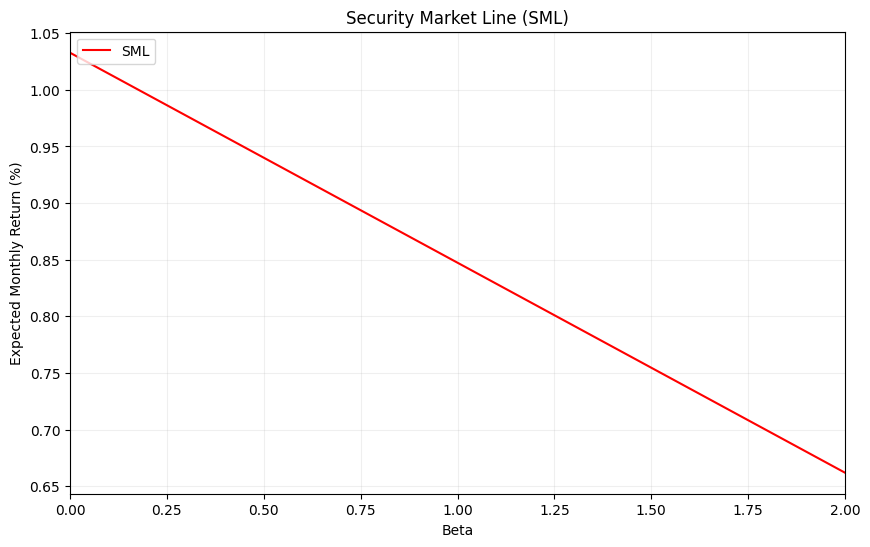

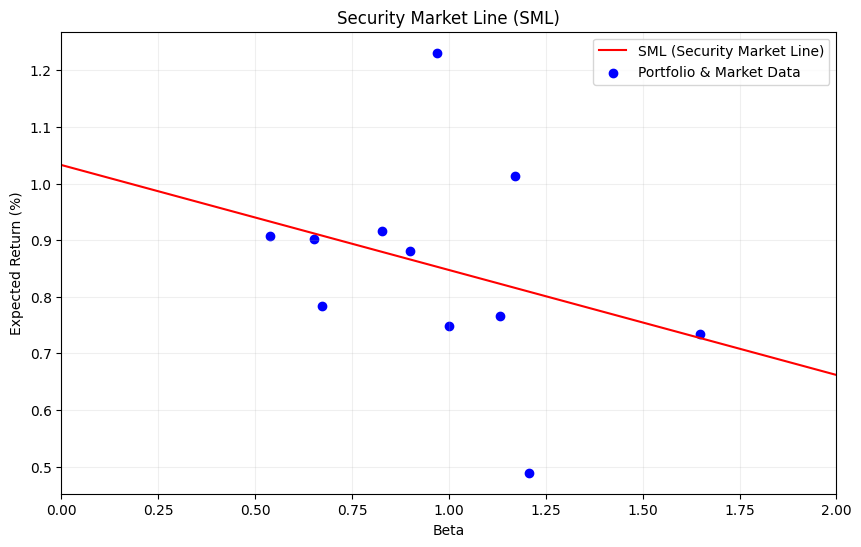

Alpha of CAPM: 1.0328
Beta of CAPM: -0.1855
R-squared of CAPM: 0.0971


,Mean Return,Beta
NoDur,0.902833,0.652647
Durbl,0.733333,1.648536
Manuf,1.012833,1.169846
Enrgy,1.231167,0.969850
HiTec,0.766250,1.132969
Telcm,0.881417,0.900729
Shops,0.916333,0.826492
Hlth,0.783833,0.673036
Utils,0.907167,0.538086
Other,0.489083,1.207309


In [331]:
CAPM(portfolio_df, market_df, 0.13, 0, 2, 100)

In [325]:
def CAPM_plot(portfolio_data, market_data, Rf, x0, xt, num):
    
    # Ensure MarketModel function is defined and available in the current context
    MM_table = MarketModel(portfolio_data, market_data, Rf)
    
    # Calculate mean returns for portfolio and market
    r_portfolio = portfolio_data.mean()
    r_market = market_data.mean()
    
    # Create CAPM table with Mean Return and Beta for each portfolio
    CAPM_table = pd.DataFrame(r_portfolio, index = portfolio_data.columns, columns = ["Mean Return"])
    CAPM_table['Beta'] = MM_table['Beta']
    
    # Market Portfolio has unit beta
    market_beta = pd.DataFrame({'Mean Return': r_market, 'Beta': [1]}, index=['Market'])
    CAPM_table = pd.concat([CAPM_table, market_beta])


    # Regression of mean return of portfolio & market on beta
    x2 = CAPM_table['Beta'].values.reshape((-1, 1))
    y2 = CAPM_table['Mean Return'].values
    model2 = LinearRegression().fit(x2, y2)
    
    # Regression results
    r_sq2 = model2.score(x2, y2)
    alpha2 = model2.intercept_
    beta2 = model2.coef_[0]   

    # Plot of SML (Security Market Line)
    x_SML = np.linspace(x0, xt, num)  # More points for a smoother line
    y_SML = alpha2 + beta2 * x_SML

    plt.figure(figsize=(10, 6))
    plt.plot(x_SML, y_SML, 'r-', label='SML')


    for i, industry in enumerate(CAPM_table.index):
        if industry == 'Market':
            plt.scatter(x2[i], y2[i], color='pink', label='Market Portfolio')  # Different color for market portfolio
        else:
            plt.scatter(x2[i], y2[i], color='blue')  # Color for other portfolios

        # Add labels for each industry and market portfolio
        plt.annotate(industry, (x2[i], y2[i]), textcoords="offset points", xytext=(5, 5), ha='center', fontsize=10)

    # Scatter plot for individual securities
    # plt.scatter(x2, y2, color='blue', label='Portfolios')

    # Set labels and title
    plt.xlabel('Beta', fontsize=12)
    plt.xlim(x0,xt)
    plt.ylabel('Expected Return (%)', fontsize=12)
    plt.title('Security Market Line (SML) of 10 Industry Portfolios and Market Portfolio', fontsize=12)
    plt.legend(loc='upper left')

    # Show the plot

    plt.grid(alpha=0.2)
    plt.show()

    # Print CAPM values
    print('Alpha of CAPM: ', np.round(alpha2, 4))
    print('Beta of CAPM: ', np.round(beta2, 4))
    print('R² of CAPM: ', np.round(r_sq2, 4))


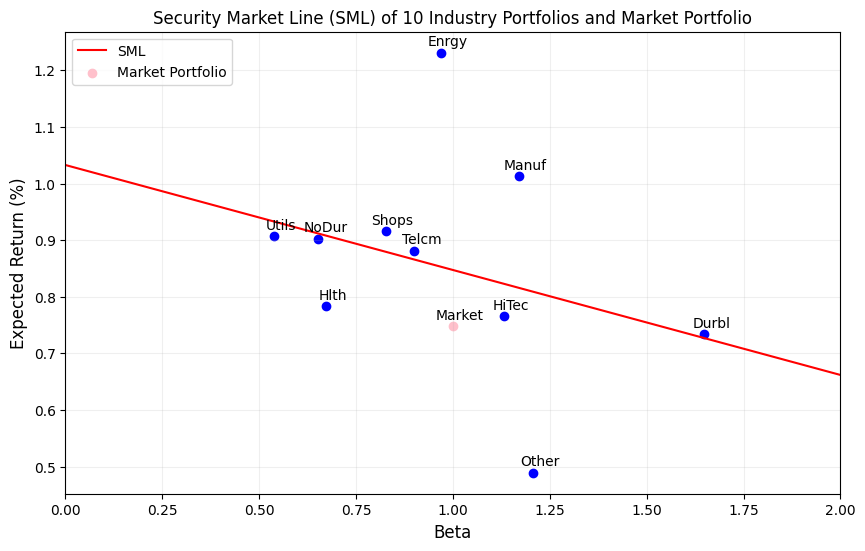

Alpha of CAPM:  1.0328
Beta of CAPM:  -0.1855
R² of CAPM:  0.0971


In [327]:
CAPM_plot(portfolio_df, market_df, 0.13, 0, 2, 100)

### 2.3 Economic significance and pricing implications of the SML

* SML shows that all appropriately-priced assets have **same Treynor ratio** ⇒ assets that lie above (or below) SML are `underpriced (or overpriced)`

# <font color = green> LINEAR FACTOR MODELS (HW3) - FAMA FRENCH-3 FACTOR

## 4.1 PERFORMANCE MEASUREMENT
Risk_Factors.xlsx contains monthly observations of the risk-free rate and the three Fama–French risk factors (expressed as percentages), over the ten-year period from Jan 2004 through Dec 2013.

Regress the monthly excess returns for each industry portfolio on the three Fama–French risk factors:

Create a table showing the factor loadings on SMB and HML for the ten industry portfolios.
Using monthly excess returns for the ten industry portfolios, calculate the following performance metrics:

* Sharpe ratio
* Sortino ratio (using risk-free rate as target)
* Treynor ratio (using CAPM β)
* Jensen's α
* Fama–French three-factor α
  
The sample semi-variance can be estimated as:
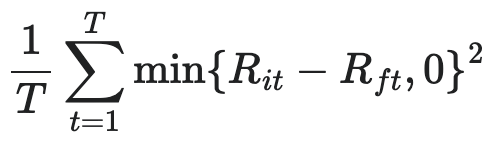

 where Ri is return on industry portfolio and Rf is risk-free rate.

### import data

In [380]:
risk_df = pd.read_excel(
    "Risk_Factors.xlsx",
    index_col=0,
    parse_dates=True,
    date_format="%Y%m"  # Use the appropriate date format
)

risk_df

,Rf,Rm-Rf,SMB,HML
Date,,,,
2004-01-01,0.07,2.15,2.67,1.55
2004-02-01,0.06,1.40,-1.17,0.45
2004-03-01,0.09,-1.32,1.84,0.07
2004-04-01,0.08,-1.83,-2.59,-1.67
2004-05-01,0.06,1.17,-0.10,-0.33
...,...,...,...,...
2013-08-01,0.00,-2.69,0.29,-2.46
2013-09-01,0.00,3.76,2.85,-1.59
2013-10-01,0.00,4.17,-1.56,1.31


### 4.1.1 Create a table showing the `performance metrics` for the ten industry portfolios.

#### 1st code - Regression (beta)

In [1031]:
from sklearn.linear_model import LinearRegression
import pandas as pd

def FF3Factor(portfolio_data, market_data, risk_data):    

    Rf = risk_data[["Rf"]]
    
    # Fama-French 3-Factor Model
    ff3_data = risk_df[["Rm-Rf", "SMB", "HML"]]
    
    # ff3_data = pd.DataFrame((market_data - Rf).values, 
    #                         columns=['Rm-Rf'],
    #                         index=market_data.index)
    
    # Add SMB and HML factors
    # ff3_data['SMB'] = risk_data['SMB'].values
    # ff3_data['HML'] = risk_data['HML'].values
    
    # Excess returns for each portfolio
    y = portfolio_data.sub(risk_df["Rf"], axis=0)
    
    # Define independent variables (3 factors)
    x = ff3_data[['Rm-Rf', 'SMB', 'HML']].values
    
    c = len(y.columns)
    
    # Regression of excess return of portfolio on the 3 factors
    model = [LinearRegression().fit(x, y.iloc[:, i]) for i in range(c)]
    r_sq = [model[i].score(x, y.iloc[:, i]) for i in range(c)]
    alpha = [model[i].intercept_ for i in range(c)]
    beta = [model[i].coef_ for i in range(c)]  # Each beta is an array for 3 factors
    
    # Convert beta coefficients into DataFrame columns
    beta_df = pd.DataFrame(beta, columns=['Beta_Rm-Rf', 'Beta_SMB', 'Beta_HML'])
    beta_df['Alpha'] = alpha
    beta_df['R2'] = r_sq
    
    # Set the index to match portfolio columns
    FF3_table = beta_df.set_index(y.columns)
    
    return FF3_table

In [1033]:
fama_french3 = FF3Factor(portfolio_df, market_df, risk_df)
fama_french3

,Beta_Rm-Rf,Beta_SMB,Beta_HML,Alpha,R2
NoDur,0.712134,-0.229102,-0.023342,0.386704,0.736825
Durbl,1.447452,0.670878,0.240949,-0.474342,0.763408
Manuf,1.142282,0.087388,0.027727,0.153285,0.915651
Enrgy,1.028354,-0.259360,-0.008158,0.523007,0.485371
HiTec,1.152803,0.335674,-0.556947,-0.065979,0.901432
Telcm,0.924137,-0.080299,-0.019063,0.200724,0.775223
Shops,0.770227,0.280191,-0.039080,0.255941,0.787620
Hlth,0.751976,-0.212655,-0.143765,0.257472,0.616766
Utils,0.631827,-0.387961,-0.016881,0.474411,0.441930
Other,1.123473,-0.061676,0.547325,-0.404412,0.928911


In [502]:
import statsmodels.api as sm
import pandas as pd

def FF3Factor2(portfolio_df, market_df, risk_df):
    Rf = risk_df["Rf"]
    
    coefficients_list = []
    alpha_list = []
    r2_list = []

    # Prepare the independent variables (add a constant to the model)
    X = sm.add_constant(risk_df[["Rm-Rf", "SMB", "HML"]])
    
    # The dependent variable = excess asset return
    y_df = portfolio_df.sub(Rf, axis=0)

    # Run the regression for each portfolio/industry
    for industry in y_df.columns:
        y = y_df[industry]
        model = sm.OLS(y, X).fit()
        
        # Extract coefficients, alpha, and R^2
        factors = model.params.index  # ['const', 'Rm-Rf', 'SMB', 'HML']
        coefficients = model.params.values
        coefficients_list.append(coefficients[1:])  # Coefficients for 'Rm-Rf', 'SMB', 'HML'
        alpha_list.append(coefficients[0])          # 'const' as alpha
        r2_list.append(model.rsquared)              # R^2 value

    # Create the DataFrame with all factors, alpha, and R^2
    FF3_table2 = pd.DataFrame(data=coefficients_list, index=y_df.columns, columns=factors[1:])
    FF3_table2["Alpha (constant)"] = alpha_list
    FF3_table2["R2"] = r2_list
    
    return FF3_table2


In [504]:
fama_french3b = FF3Factor2(portfolio_df, market_df, risk_df)
fama_french3b

,Rm-Rf,SMB,HML,Alpha (constant),R2
NoDur,0.712134,-0.229102,-0.023342,0.386704,0.736825
Durbl,1.447452,0.670878,0.240949,-0.474342,0.763408
Manuf,1.142282,0.087388,0.027727,0.153285,0.915651
Enrgy,1.028354,-0.259360,-0.008158,0.523007,0.485371
HiTec,1.152803,0.335674,-0.556947,-0.065979,0.901432
Telcm,0.924137,-0.080299,-0.019063,0.200724,0.775223
Shops,0.770227,0.280191,-0.039080,0.255941,0.787620
Hlth,0.751976,-0.212655,-0.143765,0.257472,0.616766
Utils,0.631827,-0.387961,-0.016881,0.474411,0.441930
Other,1.123473,-0.061676,0.547325,-0.404412,0.928911


#### performance metrics

In [935]:
def sharpe_ratio(portfolio_df, risk_df):
    
    excess_return = portfolio_df.sub(risk_df["Rf"], axis=0) # Ri - Rf
    
    sharpe_ratio_list = []
    industries = industry_df.columns

    for industry in industries:
        sharpe_ratio = excess_return[industry].mean()/ excess_return[industry].std()
        sharpe_ratio_list.append(sharpe_ratio)

    sharpe_ratio_table = pd.DataFrame({"Sharpe Ratio": sharpe_ratio_list}, index=industries)
    
    return sharpe_ratio_table


def sortino_ratio(portfolio_df, risk_df):
    
    excess_return = portfolio_df.sub(risk_df["Rf"], axis=0) # Ri - Rf
    
    sortino_ratio_list = []
    industries = portfolio_df.columns
    
    target_return = risk_df["Rf"]

    for industry in industries:
        downside_returns = np.where(portfolio_df[industry] < target_return, excess_return[industry], 0)
        SV = (downside_returns**2).mean()
    
        sortino_ratio = excess_return[industry].mean() / np.sqrt(SV)
        sortino_ratio_list.append(sortino_ratio)

    sortino_ratio_table = pd.DataFrame({"Sortino Ratio": sortino_ratio_list}, index=industries)

    return sortino_ratio_table

def CAPM(industry_df, market_df, risk_df):

    market_return = market_df.sub(risk_df["Rf"], axis=0).rename(columns=lambda x: "excess_market_return")
    excess_return = portfolio_df.sub(risk_df["Rf"], axis=0) # Ri - Rf
    
    alpha_list = []
    beta_list = []
    industries = portfolio_df.columns
    
    X = sm.add_constant(market_return)
    
    # The dependent variable
    y_df = excess_return
    
    for industry in industries:
        # Run the regression
        y = y_df[industry]
        model = sm.OLS(y, X).fit()
    
        alpha = model.params[0]  # Y-intercept
        alpha_list.append(alpha)
        
        beta = model.params[1]
        beta_list.append(beta)
    
    CAPM_table = pd.DataFrame({"CAPM_Alpha": alpha_list, "CAPM_Beta": beta_list}, index=industries)

    return CAPM_table

def treynor_ratio(portfolio_df, market_df, risk_df, CAPM_table):

    excess_return = portfolio_df.sub(risk_df["Rf"], axis=0) # Ri - Rf
    
    treynor_ratio = pd.DataFrame(excess_return.mean() / CAPM_table["CAPM_Beta"]).rename(columns={0: "Treynor Ratio"})
    #treynor_ratio_list.append(treynor_ratio)
    return treynor_ratio

def jensens_alpha (portfolio_df, market_df, risk_df, CAPM_table):

    excess_return = portfolio_df.sub(risk_df["Rf"], axis=0) # Ri - Rf
    
    jensens_alpha_table = CAPM_table[["CAPM_Alpha"]].rename(columns={"CAPM_Alpha":"Jensen's α"})

    return jensens_alpha_table
        

> 1. Sharpe Ratio

In [983]:
sharpe_ratio = sharpe_ratio(portfolio_df, risk_df)
sharpe_ratio

,Sharpe Ratio
NoDur,0.231099
Durbl,0.072356
Manuf,0.166616
Enrgy,0.181708
HiTec,0.118552
Telcm,0.169064
Shops,0.191753
Hlth,0.172529
Utils,0.210948
Other,0.064693


> 2. Sortino Ratio

In [981]:
sortino_ratio = sortino_ratio(portfolio_df, risk_df)
sortino_ratio

,Sortino Ratio
NoDur,0.350804
Durbl,0.111967
Manuf,0.241260
Enrgy,0.273612
HiTec,0.170620
Telcm,0.244940
Shops,0.293032
Hlth,0.270294
Utils,0.290044
Other,0.087351


> 3) Treynor ratio (using CAPM β)

In [952]:
CAPM_table = CAPM(industry_df, market_df, risk_df)
CAPM_table

,CAPM_Alpha,CAPM_Beta
NoDur,0.369717,0.653744
Durbl,-0.417903,1.649374
Manuf,0.160494,1.167929
Enrgy,0.504485,0.965527
HiTec,-0.064024,1.132387
Telcm,0.194348,0.901721
Shops,0.274093,0.829515
Hlth,0.236968,0.675890
Utils,0.446523,0.537009
Other,-0.387508,1.206992


In [979]:
treynor_ratio = treynor_ratio(portfolio_df, market_df, risk_df, CAPM_table)
treynor_ratio

,Treynor Ratio
NoDur,1.186372
Durbl,0.367463
Manuf,0.758251
Enrgy,1.143330
HiTec,0.564295
Telcm,0.836363
Shops,0.951258
Hlth,0.971435
Utils,1.452334
Other,0.299781


> 4. Jensen's α

In [975]:
jensens_alpha = jensens_alpha(portfolio_df, market_df, risk_df, CAPM_table)
jensens_alpha

,Jensen's α
NoDur,0.369717
Durbl,-0.417903
Manuf,0.160494
Enrgy,0.504485
HiTec,-0.064024
Telcm,0.194348
Shops,0.274093
Hlth,0.236968
Utils,0.446523
Other,-0.387508


> 5. Fama–French three-factor α

In [991]:
Fama_French_3_alpha = fama_french3[["Alpha"]].rename(columns={"Alpha": "FF3 Factor α"})
Fama_French_3_alpha

,FF3 Factor α
NoDur,0.386704
Durbl,-0.474342
Manuf,0.153285
Enrgy,0.523007
HiTec,-0.065979
Telcm,0.200724
Shops,0.255941
Hlth,0.257472
Utils,0.474411
Other,-0.404412


> single table showing the performance metrics


In [997]:
industry_performance = pd.concat([sharpe_ratio, sortino_ratio, treynor_ratio, jensens_alpha, Fama_French_3_alpha], axis=1)
industry_performance.to_csv("HW3_industry_performance.csv")
industry_performance

,Sharpe Ratio,Sortino Ratio,Treynor Ratio,Jensen's α,FF3 Factor α
NoDur,0.231099,0.350804,1.186372,0.369717,0.386704
Durbl,0.072356,0.111967,0.367463,-0.417903,-0.474342
Manuf,0.166616,0.241260,0.758251,0.160494,0.153285
Enrgy,0.181708,0.273612,1.143330,0.504485,0.523007
HiTec,0.118552,0.170620,0.564295,-0.064024,-0.065979
Telcm,0.169064,0.244940,0.836363,0.194348,0.200724
Shops,0.191753,0.293032,0.951258,0.274093,0.255941
Hlth,0.172529,0.270294,0.971435,0.236968,0.257472
Utils,0.210948,0.290044,1.452334,0.446523,0.474411
Other,0.064693,0.087351,0.299781,-0.387508,-0.404412


,Sharpe Ratio,Treynor Ratio,Information Ratio,Sortino Ratio,Jensen's Alpha,FF3Factor's Alpha
NoDur,0.219977,1.126451,0.219977,0.207948,0.032511,0.386704
Durbl,0.088135,0.445956,0.088135,0.207948,0.213481,-0.474342
Manuf,0.138898,0.628437,0.138898,0.207948,0.324522,0.153285
Enrgy,0.121520,0.758030,0.121520,0.207948,0.472473,0.523007
HiTec,0.136968,0.648892,0.136968,0.207948,0.064961,-0.065979
Telcm,0.165498,0.816200,0.165498,0.207948,0.098398,0.200724
Shops,0.179402,0.889512,0.179402,0.207948,0.107190,0.255941
Hlth,0.193991,1.092327,0.193991,0.207948,-0.079314,0.257472
Utils,0.199680,1.366278,0.199680,0.207948,-0.003472,0.474411
Other,0.131995,0.608937,0.131995,0.207948,-0.186044,-0.404412


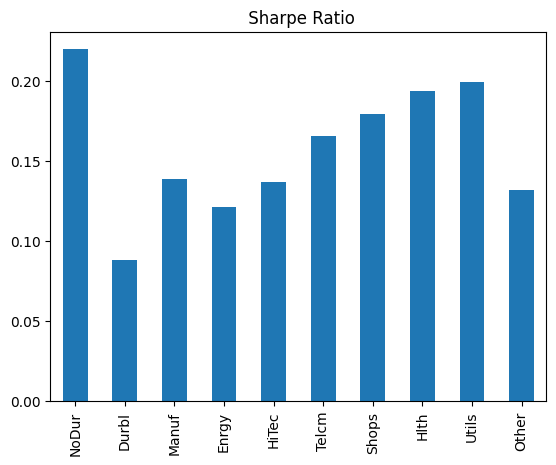

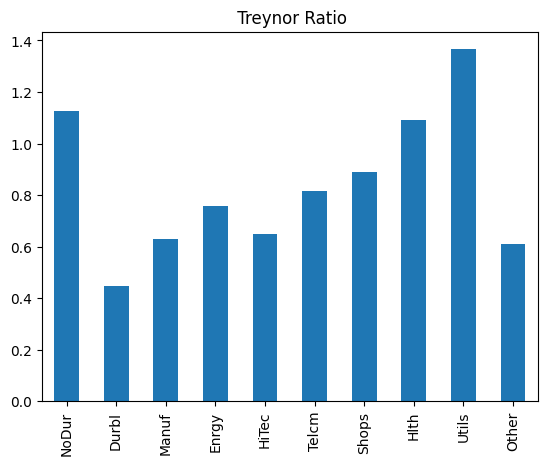

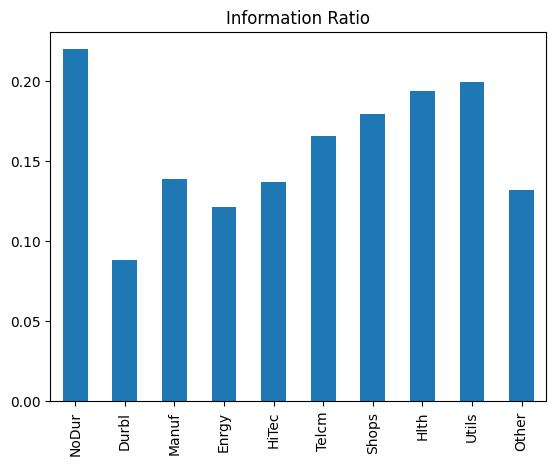

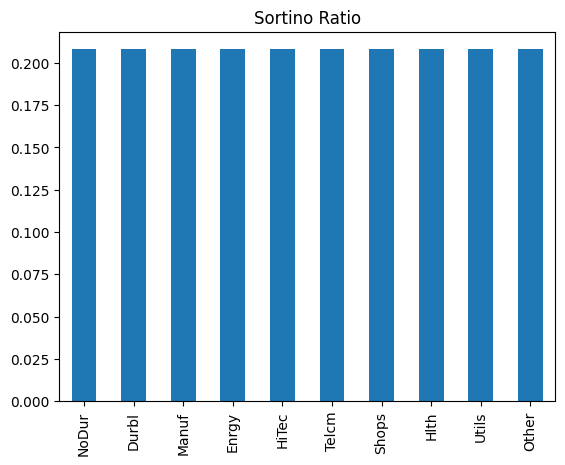

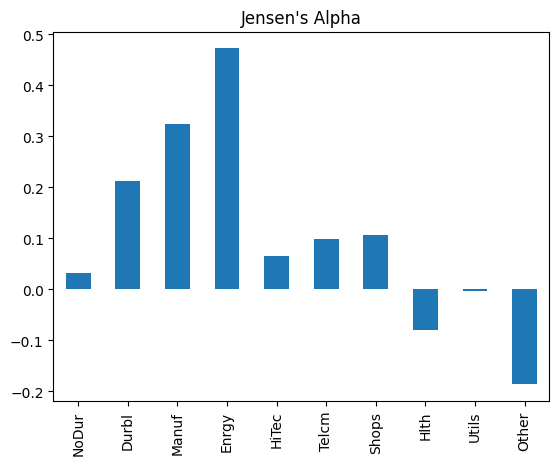

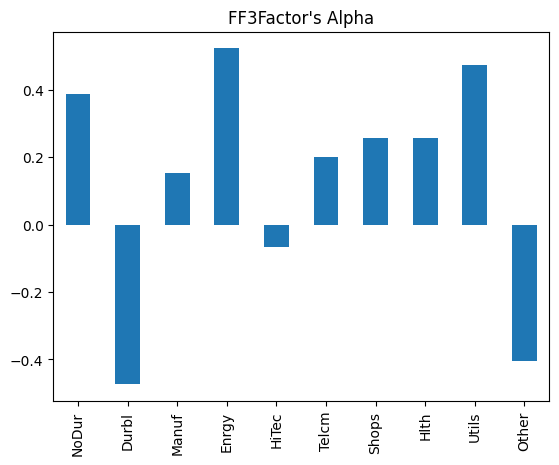

,Sharpe Ratio,Treynor Ratio,Information Ratio,Sortino Ratio,Jensen's Alpha,FF3Factor's Alpha
NoDur,0.219977,1.126451,0.219977,0.207948,0.032511,0.386704
Durbl,0.088135,0.445956,0.088135,0.207948,0.213481,-0.474342
Manuf,0.138898,0.628437,0.138898,0.207948,0.324522,0.153285
Enrgy,0.121520,0.758030,0.121520,0.207948,0.472473,0.523007
HiTec,0.136968,0.648892,0.136968,0.207948,0.064961,-0.065979
Telcm,0.165498,0.816200,0.165498,0.207948,0.098398,0.200724
Shops,0.179402,0.889512,0.179402,0.207948,0.107190,0.255941
Hlth,0.193991,1.092327,0.193991,0.207948,-0.079314,0.257472
Utils,0.199680,1.366278,0.199680,0.207948,-0.003472,0.474411
Other,0.131995,0.608937,0.131995,0.207948,-0.186044,-0.404412


In [845]:
def PerformanceMetrics(portfolio_data, market_data, risk_data):
    

    #Excess return with rf
    excess_rf = portfolio_data.sub(risk_data["Rf"], axis=0)
    var_rf = np.var(excess_rf)

    #Excess return with target (here the target is Rf)
    excess_target = portfolio_data.sub(risk_data["Rf"], axis=0)
    var_target = np.var(excess_target)
    semivar_target = np.mean(np.minimum(excess_target, 0)**2)

    #Market Model Regression
    MM_table = MarketModel(portfolio_data, market_data, Rf)

    #FF 3 Factor Model Regression
    FF_table = FF3Factor(portfolio_data, market_data, risk_data)

    #Metrics
    sharpe = np.mean(excess_rf) / np.sqrt(var_rf)
    treynor = np.mean(excess_rf) / MM_table['Beta']
    information = np.mean(excess_target) / np.sqrt(var_target)
    sortino = np.mean(excess_target) / np.sqrt(semivar_target)
    jensen_alpha = MM_table['Alpha']
    threefactor_alpha = FF_table['Alpha']
    
    metrics_table = pd.DataFrame({' Sharpe Ratio': sharpe,
                                  ' Treynor Ratio': treynor,
                                  'Information Ratio': information,
                                  'Sortino Ratio': sortino,
                                  "Jensen's Alpha": jensen_alpha,
                                  "FF3Factor's Alpha": threefactor_alpha},
                                index = portfolio_data.columns)

    display(metrics_table)
    
    m = len(metrics_table.columns)
    bar_plot = [metrics_table.iloc[:,[i]].plot(kind='bar', 
                title=metrics_table.columns[i], 
                legend = None) for i in range(m)]
    plt.show()

    return metrics_table

PerformanceMetrics(portfolio_df, market_df, risk_df)

### 4.1.2 Plot your results as a bar chart for each performance metric.

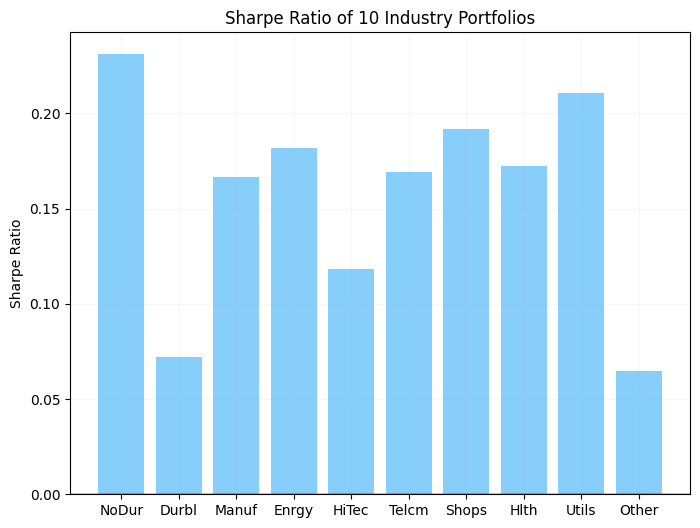

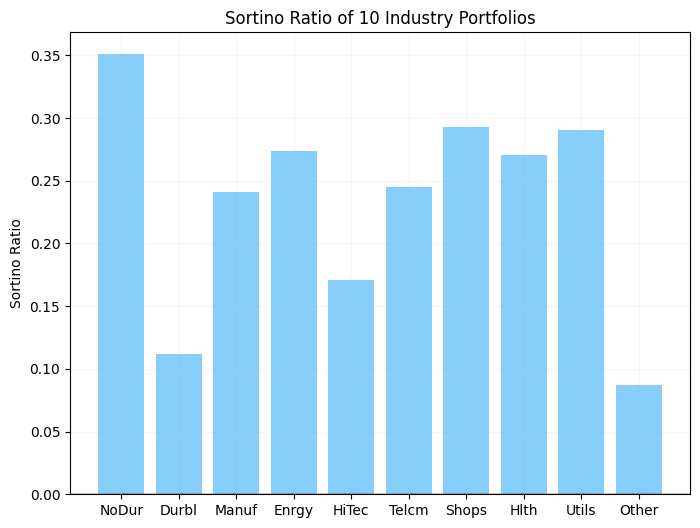

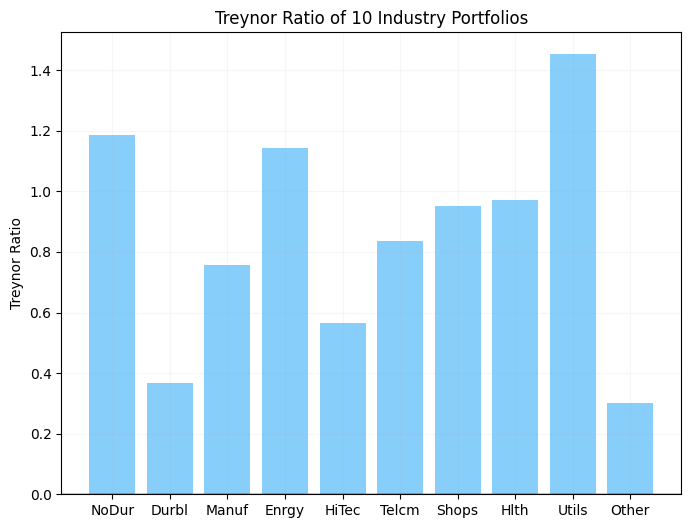

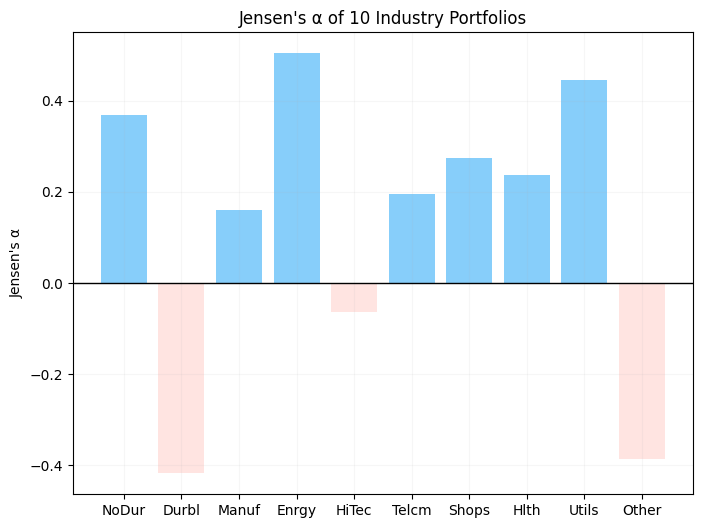

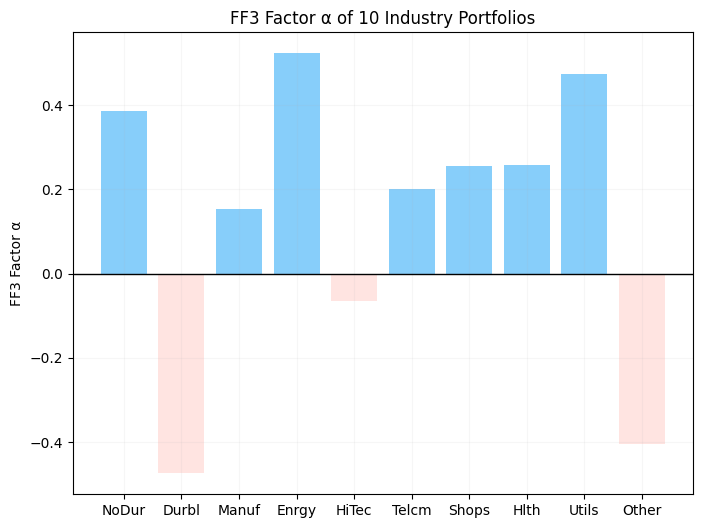

In [999]:
for metric in industry_performance.columns:
    plt.figure(figsize=(8,6))

    colors = ['lightskyblue' if x>=0 else 'mistyrose' for x in industry_performance[metric]]
    
    plt.bar(industry_performance.index, industry_performance[metric], color=colors)
    plt.title(f'{metric} of 10 Industry Portfolios')
    plt.ylabel(metric)
    plt.axhline(y=0,color = "black", linewidth = 1)

    plt.grid(alpha=0.1)  

### 4.1.3 economic significance and pricing implications of each of the three performance ratios (but not α's).

#### `1. Sharpe Ratio`
Sharpe ratio shows **risk premium per unit of total risk**:
* Includes **idiosyncratic risk**, which doesn't contribute to risk premium ⇒ should **not** be used to compare performance for investments with different amounts of idiosyncratic risk
* Implicitly **assumes normal returns** ⇒ should **not** be used to measure performance for investments with asymmetric return distribution

#### `2. Sortino Ratio`
Sortino ratio shows risk premium per unit of downside risk:
* can be used to measure performance for investments with **asymmetric return distribution**, since downside risk can distinguish between distributions with same variance but `different skewness`

#### `3. Treynor Ratio`
Treynor ratio shows **risk premium per unit of (exposure to) market risk**:
* `Ignores idiosyncratic risk` ⇒ can be used to compare performance for investments with different amounts of idiosyncratic risk
* Ignores other types of systematic risk ⇒ should **not** be used to measure performance for investments with significant exposure to other types of systematic risk


## <font color = blue> CARHART 4 FACTOR

In [1001]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

def FF3Factor(portfolio_data, market_data, risk_data):    

    Rf = risk_data[["Rf"]]
    
    # Fama-French 3-Factor Model
    ff3_data = risk_df[["Rm-Rf", "SMB", "HML"]]
    
    # ff3_data = pd.DataFrame((market_data - Rf).values, 
    #                         columns=['Rm-Rf'],
    #                         index=market_data.index)
    
    # Add SMB and HML factors
    # ff3_data['SMB'] = risk_data['SMB'].values
    # ff3_data['HML'] = risk_data['HML'].values
    
    # Excess returns for each portfolio
    y = portfolio_data.sub(risk_df["Rf"], axis=0)
    
    # Define independent variables (3 factors)
    x = ff3_data[['Rm-Rf', 'SMB', 'HML']].values
    
    c = y.shape[1]  # Number of portfolios/columns
    
    # Regression of excess return of portfolio on the 3 factors
    model = [LinearRegression().fit(x, y.iloc[:, i]) for i in range(c)]
    r_sq = [model[i].score(x, y.iloc[:, i]) for i in range(c)]
    alpha = [model[i].intercept_ for i in range(c)]
    beta = [model[i].coef_ for i in range(c)]  # Each beta is an array for 4 factors
    
    # Convert beta coefficients into DataFrame columns
    beta_df = pd.DataFrame(beta, columns=['Beta_Rm-Rf', 'Beta_SMB', 'Beta_HML'])
    beta_df['Alpha'] = alpha
    beta_df['R2'] = r_sq
    
    # Set the index to match portfolio columns
    FF3_table = beta_df.set_index(y.columns)
    
    return FF3_table

In [1051]:
# DUMMY DATASET TO INCLUDE UMD
risk_df2 = risk_df.copy()
risk_df2["UMD"] = risk_df2["SMB"] * 1.5
risk_df2

,Rf,Rm-Rf,SMB,HML,UMD
Date,,,,,
2004-01-01,0.07,2.15,2.67,1.55,4.005
2004-02-01,0.06,1.40,-1.17,0.45,-1.755
2004-03-01,0.09,-1.32,1.84,0.07,2.760
2004-04-01,0.08,-1.83,-2.59,-1.67,-3.885
2004-05-01,0.06,1.17,-0.10,-0.33,-0.150
...,...,...,...,...,...
2013-08-01,0.00,-2.69,0.29,-2.46,0.435
2013-09-01,0.00,3.76,2.85,-1.59,4.275
2013-10-01,0.00,4.17,-1.56,1.31,-2.340


In [1047]:
#Carhart 4-Factor Model


def Carhart(portfolio_df, market_df, risk_df):    
    
    Rf = risk_df[["Rf"]]
    
    #assume given a dataset consisting these 4 columns
    carhart_data = risk_df[["Rm-Rf", "SMB", "HML", "UMD"]]
    
    #Carhart 4-Factor Model
    # data_factors = pd.DataFrame((data_market-array_rf).values, 
    #                             columns = ['Rm-Rf'],
    #                             index = data_market.index)
    # data_factors['SMB'] = data_smb.values
    # data_factors['HML'] = data_hml.values
    # data_factors['UMD'] = data_umd.values
    
    x = carhart_data[['Rm-Rf','SMB', 'HML', 'UMD']].values #.reshape(-1 ,4)
    y = portfolio_df.sub(risk_df["Rf"], axis=0)
    
    c = len(y.columns)
    
    #Regression of excess return of portfolio on the 3 factors
    model = [LinearRegression().fit(x, y.iloc[:,i]) for i in range(c)]
    r_sq = [model[i].score(x, y.iloc[:,i]) for i in range(c)]
    alpha = [model[i].intercept_ for i in range(c)]
    beta = [model[i].coef_ for i in range(c)]

    beta_df = pd.DataFrame(beta, columns=['Beta_Rm-Rf', 'Beta_SMB', 'Beta_HML', 'Beta_UMD'])
    beta_df['Alpha'] = alpha
    beta_df['R2'] = r_sq

    carhart_table = beta_df.set_index(y.columns)

    # carhart_table = pd.DataFrame({'Alpha': alpha, 'Beta': beta, 'R2': r_sq}, 
    #                           index = y.columns)
    
    return carhart_table

In [1049]:
Carhart(portfolio_df, market_df, risk_df2)

,Beta_Rm-Rf,Beta_SMB,Beta_HML,Beta_UMD,Alpha,R2
NoDur,0.712134,-2.031086e+14,-0.533414,1.354057e+14,0.413524,0.590529
Durbl,1.447452,9.459829e+13,0.478867,-6.306552e+13,-0.489413,0.758920
Manuf,1.142282,-3.571592e+12,0.018738,2.381061e+12,0.153707,0.915625
Enrgy,1.028354,-1.211205e+14,-0.311642,8.074698e+13,0.535690,0.469574
HiTec,1.152803,2.861741e+14,0.136901,-1.907827e+14,-0.105058,0.799693
Telcm,0.924137,1.342409e+14,0.320110,-8.949394e+13,0.179263,0.739546
Shops,0.770227,-3.433529e+14,-0.905678,2.289019e+14,0.306203,0.513524
Hlth,0.751976,-7.265744e+12,-0.161904,4.843830e+12,0.258953,0.616695
Utils,0.631827,-3.959719e+13,-0.115636,2.639812e+13,0.481184,0.437757
Other,1.123473,-3.938925e+13,0.452574,2.625950e+13,-0.401627,0.926769


# <font color = green> EFFICIENT FRONTIER REVISITED (HW4)

In [645]:
import pandas as pd

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

## 5.1 MINIMUM TRACKING ERROR FRONTIER

In [647]:
market_df

,Market
Date,
200401,2.22
200402,1.46
200403,-1.23
200404,-1.75
200405,1.23
...,...
201308,-2.69
201309,3.76
201310,4.17


### 5.1.1 Plot the `minimum-tracking-error frontier` generated by the ten industry portfolios:

In [713]:
Ri_Rm = portfolio_df.sub(market_df["Market"], axis=0)
Ri_Rm_mean = Ri_Rm.mean()
Ri_Rm_mean

NoDur    0.154750
Durbl   -0.014750
Manuf    0.264750
Enrgy    0.483083
HiTec    0.018167
Telcm    0.133333
Shops    0.168250
Hlth     0.035750
Utils    0.159083
Other   -0.259000
dtype: float64

In [733]:
# y0, yt, increment are for the vertical axis 
def min_tracking_error(portfolio_data, market_data, y0, yt, increment):

    # Rm as the target return
    Ri_Rm = portfolio_data.sub(market_data["Market"], axis=0)
    Ri_Rm_mean = Ri_Rm.mean()      
    R_deviation.to_csv("HW4_Expected_Return_Deviation.csv")
    
    # V is nxn covariance matrix, V_inv = V^-1
    V = Ri_Rm.cov()  #must use the deviation return data
    V_inv = np.linalg.inv(V)
   
    # R = (R1, .., Rn)' nx1 vector of expected return deviation
    R = np.array(Ri_Rm_mean)

    # e = (1, ...1) is nx1 unit vector 
    e = np.ones(len(Ri_Rm_mean))

    # Calculate alpha, zeta, and delta
    # alpha = R' (transpose of R) x V^-1 (inverse of V) x e
    # zeta = R' x V^-1 x R
    # delta = e' x V^-1 x e

    alpha = R.T @ V_inv @ e
    zeta = R.T @ V_inv @ R
    delta = e.T @ V_inv @ e

    # Rmv (global minimum-variance portfolio) = alpha / delta
    Rmv = alpha / delta

    # Rp --> Portfolio  must have mean return of Rp
    Rp = np.arange(y0, yt+increment, increment) # e.g from 0 to 2 with increment of 0.01

    # Variance (sigma square of p)
    # To perform exponentiation in Python, you should use ** instead of ^
    # formula from slides 13
    variance_p = 1 / delta + delta / (zeta * delta - alpha**2) * (Rp - Rmv)**2
    sigma_p = np.sqrt(variance_p)

    error_tracking_frontier_df = pd.DataFrame({
                        'Rp': Rp,
                        'Sigma_p' : sigma_p
                        })
    
    # Print values of alpha, zeta, and delta
    print(f'Alpha (α): {alpha}')
    print(f'Zeta (ζ): {zeta}')
    print(f'Delta (δ): {delta}')
    
    return error_tracking_frontier_df
   

In [748]:
#This graph must cover the range from 0% to 0.1% on the vertical axis, in increments of 0.005% (or less).
tracking_error_df = min_tracking_error(portfolio_df, market_df, 0, 0.1, 0.0005)
tracking_error_df

Alpha (α): 2.9321278826306267
Zeta (ζ): 0.20474497351130097
Delta (δ): 58.55025437639908


,Rp,Sigma_p
0,0.0000,0.245740
1,0.0005,0.243982
2,0.0010,0.242230
3,0.0015,0.240484
4,0.0020,0.238742
...,...,...
196,0.0980,0.238194
197,0.0985,0.239934
198,0.0990,0.241679
199,0.0995,0.243429


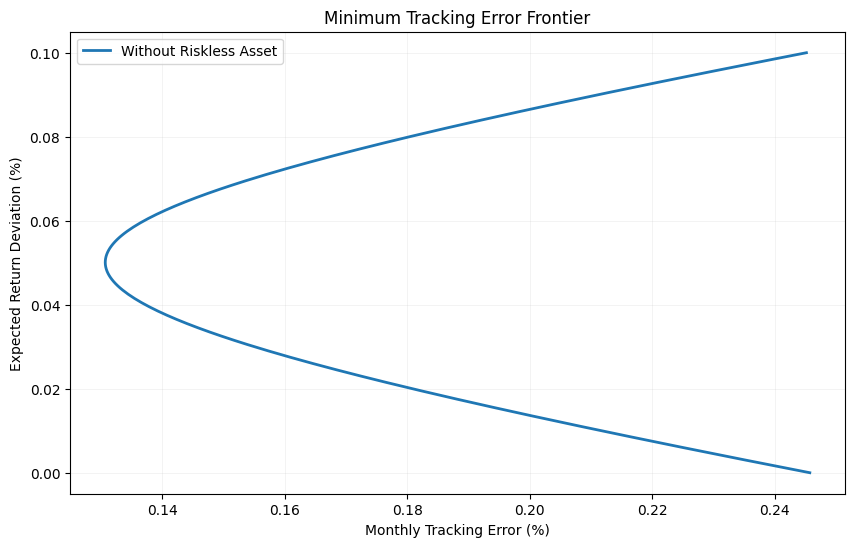

In [750]:
def tracking_error_plot(tracking_error_df):
    plt.figure(figsize = (10,6))
    plt.plot(tracking_error_df['Sigma_p'], tracking_error_df['Rp'], label= "Without Riskless Asset", linewidth=2)
    
    plt.xlabel('Monthly Tracking Error (%)')
    plt.ylabel('Expected Return Deviation (%)')
    plt.title('Minimum Tracking Error Frontier')
    
    plt.grid(linestyle='-', linewidth=0.5, alpha=0.2)
    plt.legend()

    plt.savefig('tracking_error.png') 
    plt.show()

tracking_error_plot(tracking_error_df)

### 5.1.2 plot the line starting from the origin that is `tangent` to the upper half of the minimum-tracking-error frontier.

In [774]:
# y0, yt, increment are for the vertical axis 
def min_tracking_error_tg(portfolio_data, market_data, y0, yt, increment):

    # Rm as the target return
    Ri_Rm = portfolio_data.sub(market_data["Market"], axis=0)
    Ri_Rm_mean = Ri_Rm.mean()      
    R_deviation.to_csv("HW4_Expected_Return_Deviation.csv")
    
    # V is nxn covariance matrix, V_inv = V^-1
    V = Ri_Rm.cov()  #must use the deviation return data
    V_inv = np.linalg.inv(V)
   
    # R = (R1, .., Rn)' nx1 vector of expected return deviation
    R = np.array(Ri_Rm_mean)

    # e = (1, ...1) is nx1 unit vector 
    e = np.ones(len(Ri_Rm_mean))

    # Calculate alpha, zeta, and delta
    # alpha = R' (transpose of R) x V^-1 (inverse of V) x e
    # zeta = R' x V^-1 x R
    # delta = e' x V^-1 x e

    alpha = R.T @ V_inv @ e
    zeta = R.T @ V_inv @ R
    delta = e.T @ V_inv @ e

    # Rmv (global minimum-variance portfolio) = alpha / delta
    Rmv = alpha / delta
    sigma_mv = np.sqrt(1/delta)
    
    # Rp --> Portfolio  must have mean return of Rp
    Rp = np.arange(y0, yt+increment, increment) # e.g from 0 to 2 with increment of 0.01

    # Variance (sigma square of p)
    # To perform exponentiation in Python, you should use ** instead of ^
    # formula from slides 13
    variance_p = 1 / delta + delta / (zeta * delta - alpha**2) * (Rp - Rmv)**2
    sigma_p = np.sqrt(variance_p)

    error_tracking_frontier_df = pd.DataFrame({
                        'Rp': Rp,
                        'Sigma_p' : sigma_p
                        })
    
    # Print values of alpha, zeta, and delta
    print(f'Alpha (α): {alpha}')
    print(f'Zeta (ζ): {zeta}')
    print(f'Delta (δ): {delta}')



    #starting from the origin --> y-intercept = Rf = 0
    Rf = 0

    # Mean Return for tangency portfolio and variance
    Rtg = (alpha * Rf - zeta) / (delta * Rf - alpha)
    sigma_tg = - (zeta - 2 * alpha * Rf + delta * Rf**2)**0.5 / (delta * (Rf- Rmv))

    # Tangent Line
    Rp_tangency = np.arange(0, 0.205, 0.005) #to tune!!!
    variance_tangency = (Rp_tangency-Rf)**2 / (zeta - 2 * alpha * Rf + delta * Rf**2)
    std_tangency = np.sqrt(variance_tangency)


    tangency_portfolio = pd.DataFrame({
    'Rp Tangent' : Rp_tangency,
    'Sigma Tangent' : std_tangency
    })
    
    tangency_portfolio

    # Plot minimum frontier
    plt.figure(figsize = (10,6))
    plt.plot(error_tracking_frontier_df['Sigma_p'], error_tracking_frontier_df['Rp'], label= "Minimum Tracking Error", linewidth=2)
    plt.xlabel('Monthly Tracking Error (%)')
    plt.ylabel('Expected Monthly Return Deviation (%)')
    plt.title('Minimum Tracking Error Frontier')
    plt.grid(linestyle='-', linewidth=0.5, alpha=0.3)
    plt.legend()
    plt.ylim(0,0.11)
    plt.xlim(0, 0.25)


    # Plot tangency line 
    plt.plot(tangency_portfolio['Sigma Tangent'], tangency_portfolio['Rp Tangent'], label = "Tangent Line", color = 'red')

    # dot
    plt.plot(sigma_tg, Rtg, "ro", label = "Tangency Portfolio", markersize=6)
    plt.plot(sigma_mv, Rmv, "o", color="blue", markersize=6)

    plt.axhline(y = Rmv, color ="black", linestyle = '--', alpha = 0.4)
    plt.legend()
    
    return tangency_portfolio
   

Alpha (α): 2.9321278826306267
Zeta (ζ): 0.20474497351130097
Delta (δ): 58.55025437639908


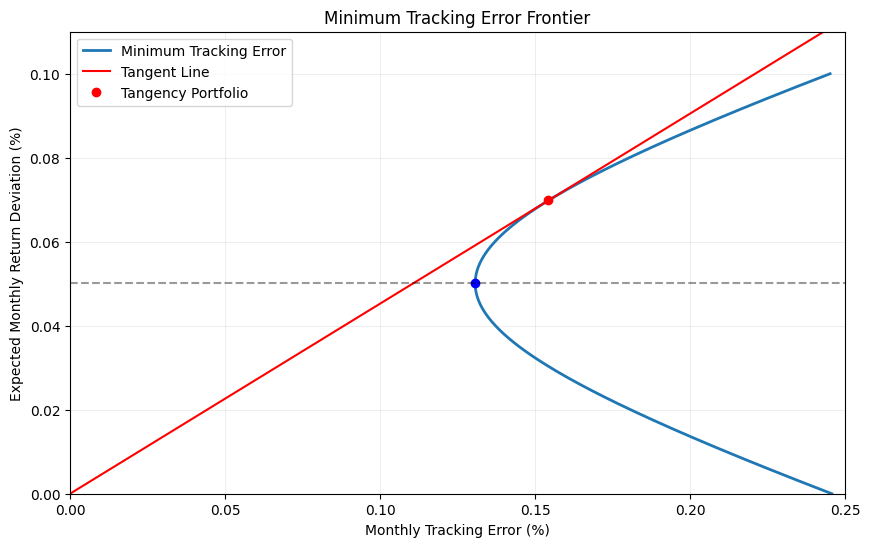

In [776]:
tracking_error_tangency = min_tracking_error_tg(portfolio_df, market_df, 0, 0.1, 0.0005)

### 5.1.3 Calculate information ratio and portfolio weights for the "tangency" portfolio.

In [824]:
# y0, yt, increment are for the vertical axis 
def cal_information_ratio_weights(portfolio_data, market_data, y0, yt, increment):

    # Rm as the target return
    Ri_Rm = portfolio_data.sub(market_data["Market"], axis=0)
    Ri_Rm_mean = Ri_Rm.mean()      
    R_deviation.to_csv("HW4_Expected_Return_Deviation.csv")
    
    # V is nxn covariance matrix, V_inv = V^-1
    V = Ri_Rm.cov()  #must use the deviation return data
    V_inv = np.linalg.inv(V)
   
    # R = (R1, .., Rn)' nx1 vector of expected return deviation
    R = np.array(Ri_Rm_mean)

    # e = (1, ...1) is nx1 unit vector 
    e = np.ones(len(Ri_Rm_mean))

    # Calculate alpha, zeta, and delta
    # alpha = R' (transpose of R) x V^-1 (inverse of V) x e
    # zeta = R' x V^-1 x R
    # delta = e' x V^-1 x e

    alpha = R.T @ V_inv @ e
    zeta = R.T @ V_inv @ R
    delta = e.T @ V_inv @ e

    # Rmv (global minimum-variance portfolio) = alpha / delta
    Rmv = alpha / delta
    sigma_mv = np.sqrt(1/delta)
    
    # Rp --> Portfolio  must have mean return of Rp
    Rp = np.arange(y0, yt+increment, increment) # e.g from 0 to 2 with increment of 0.01

    # Variance (sigma square of p)
    # To perform exponentiation in Python, you should use ** instead of ^
    # formula from slides 13
    variance_p = 1 / delta + delta / (zeta * delta - alpha**2) * (Rp - Rmv)**2
    sigma_p = np.sqrt(variance_p)

    error_tracking_frontier_df = pd.DataFrame({
                        'Rp': Rp,
                        'Sigma_p' : sigma_p
                        })
    
    # Print values of alpha, zeta, and delta
    # print(f'Alpha (α): {alpha}')
    # print(f'Zeta (ζ): {zeta}')
    # print(f'Delta (δ): {delta}')

    #starting from the origin --> y-intercept = Rf = 0
    Rf = 0

    # Mean Return for tangency portfolio and variance
    Rtg = (alpha * Rf - zeta) / (delta * Rf - alpha)
    sigma_tg = - (zeta - 2 * alpha * Rf + delta * Rf**2)**0.5 / (delta * (Rf- Rmv))

    # Tangent Line
    Rp_tangency = np.arange(0, 0.205, 0.005) #to tune!!!
    variance_tangency = (Rp_tangency-Rf)**2 / (zeta - 2 * alpha * Rf + delta * Rf**2)
    std_tangency = np.sqrt(variance_tangency)


    tangency_portfolio = pd.DataFrame({
    'Rp Tangent' : Rp_tangency,
    'Sigma Tangent' : std_tangency
    })
    
    tangency_portfolio

    # Plot minimum frontier
    # plt.figure(figsize = (10,6))
    # plt.plot(error_tracking_frontier_df['Sigma_p'], error_tracking_frontier_df['Rp'], label= "Minimum Tracking Error", linewidth=2)
    # plt.xlabel('Monthly Tracking Error (%)')
    # plt.ylabel('Expected Monthly Return Deviation (%)')
    # plt.title('Minimum Tracking Error Frontier')
    # plt.grid(linestyle='-', linewidth=0.5, alpha=0.3)
    # plt.legend()
    # plt.ylim(0,0.11)
    # plt.xlim(0, 0.25)


    # # Plot tangency line 
    # plt.plot(tangency_portfolio['Sigma Tangent'], tangency_portfolio['Rp Tangent'], label = "Tangent Line", color = 'red')

    # # dot
    # plt.plot(sigma_tg, Rtg, "ro", label = "Tangency Portfolio", markersize=6)
    # plt.plot(sigma_mv, Rmv, "o", color="blue", markersize=6)

    # plt.axhline(y = Rmv, color ="black", linestyle = '--', alpha = 0.4)
    # plt.legend()
    
    information_ratio = Rtg / sigma_tg

    # Tangency Portfolio Information
    print(f"Tangency Portfolio Return Deviation: {Rtg:.4f}%")        # intersection point
    print(f"Tangency Portfolio Tracking Error: {sigma_tg:.4f}")   # intersection point
    print(f"Tangency Portfolio Information Ratio: {information_ratio:.4f}")    # slope

    # Langrange Multuplier
    lmbd = (R - Rf) / (zeta - 2 * alpha * Rf + delta * Rf **2)

    # Calculate w (Weights of tangency portfolio)
    w = lmbd * V_inv @ (Rtg - Rf*e)
    weights_df = pd.DataFrame({"Industry": Ri_Rm_mean.index,
                     "Expected Return Deviation": Ri_Rm_mean,
                     "Weight" :  w})

    display(weights_df)
    
    return information_ratio, weights_df
   

In [826]:
information_ratio, weights_df = cal_information_ratio_weights(portfolio_df, market_df, 0, 0.1, 0.0005)

Tangency Portfolio Return Deviation: 0.0698%
Tangency Portfolio Tracking Error: 0.1543
Tangency Portfolio Information Ratio: 0.4525


,Industry,Expected Return Deviation,Weight
NoDur,NoDur,0.154750,0.052634
Durbl,Durbl,-0.014750,0.000153
Manuf,Manuf,0.264750,0.137627
Enrgy,Enrgy,0.483083,0.087032
HiTec,HiTec,0.018167,0.179353
Telcm,Telcm,0.133333,0.071074
Shops,Shops,0.168250,0.106884
Hlth,Hlth,0.035750,0.102776
Utils,Utils,0.159083,0.040162
Other,Other,-0.259000,0.222304


### Black litterman - Implied Risk Premium

In [1220]:
# risk aversion coeff or lambda
Rm = market_df.mean()
var_Rm = market_df.var()
Rf = 0.13

risk_aversion_coeff = ((Rm - Rf) / (var_Rm)).values
risk_aversion_coeff

array([0.03279572])

In [1264]:
# V or asset covariance matrix
V = (portfolio_df-Rf).cov()  #must use the deviation return data
#V_inv = np.linalg.inv(V)

In [1224]:
# Wm = market weight or tangency portfolio weights
Wm = np.array(tangency_portfolio["Tangency Weight w*"]).reshape(-1)

In [1226]:
tangency_portfolio

,Industry,Mean Return,Std Deviation,Tangency Weight w*
0,NoDur,0.902833,3.345657,0.567972
1,Durbl,0.733333,8.361852,-0.214073
2,Manuf,1.012833,5.310270,0.714105
3,Enrgy,1.231167,6.081524,0.104087
4,HiTec,0.766250,5.381191,-0.363438
5,Telcm,0.881417,4.448284,-0.095463
6,Shops,0.916333,4.093786,0.991647
7,Hlth,0.783833,3.787172,0.075570
8,Utils,0.907167,3.701763,0.132643
9,Other,0.489083,5.582452,-0.913051


In [1228]:
risk_aversion_coeff.shape

(1,)

In [1230]:
Wm

array([ 0.56797218, -0.2140726 ,  0.71410511,  0.10408719, -0.36343817,
       -0.09546326,  0.99164683,  0.0755702 ,  0.13264333, -0.91305081])

In [1232]:
V.shape

(10, 10)

In [1234]:
Wm.shape

(10,)

In [1266]:
implied_risk_premium = risk_aversion_coeff * (V @ Wm)

implied_risk_premium

NoDur    0.211068
Durbl    0.164776
Manuf    0.241110
Enrgy    0.300739
HiTec    0.173766
Telcm    0.205219
Shops    0.214755
Hlth     0.178568
Utils    0.212251
Other    0.098069
dtype: float64

In [1254]:
implied_risk_df = pd.DataFrame({"Implied risk": implied_risk_premium})
implied_risk_df.to_excel("Implied_risk.xlsx")

implied_risk_df

,Implied risk
NoDur,0.211068
Durbl,0.164776
Manuf,0.241110
Enrgy,0.300739
HiTec,0.173766
Telcm,0.205219
Shops,0.214755
Hlth,0.178568
Utils,0.212251
Other,0.098069


## 5.2 MINIMUM-VARIANCE FRONTIER W/O SHORT SALES

Use Monte Carlo method to simulate the minimum-variance frontier without short sales, generated by the ten industry portfolios. Portfolio weights will be limited to the range [0, 1].

Randomly draw each element of w, the 10 × 1 vector of portfolio weights, from the (standard) uniform distribution in the range [0, 1]. Divide w by the sum of portfolio weights, to ensure that the portfolio weights sum to one. This normalised w represents portfolio weights for one simulated portfolio, without short sales.

Use the normalised w along with the vector of mean returns and the covariance matrix of returns (for the ten industry portfolios) to calculate the mean return and standard deviation of return for the simulated portfolio. Repeat this process until you have (at least) 105 data points.

### 5.2.1 Plot the data points with mean return on the vertical axis vs standard deviation of return on the horizontal axis.

,Portfolio Returns,Portfolio Std
0,0.841730,4.281054
1,0.895104,3.948641
2,0.924104,4.309044
3,0.833698,4.164946
4,0.872628,3.785164
...,...,...
99995,0.896360,4.396034
99996,0.868784,4.089934
99997,0.810138,4.715809
99998,0.905554,3.848030


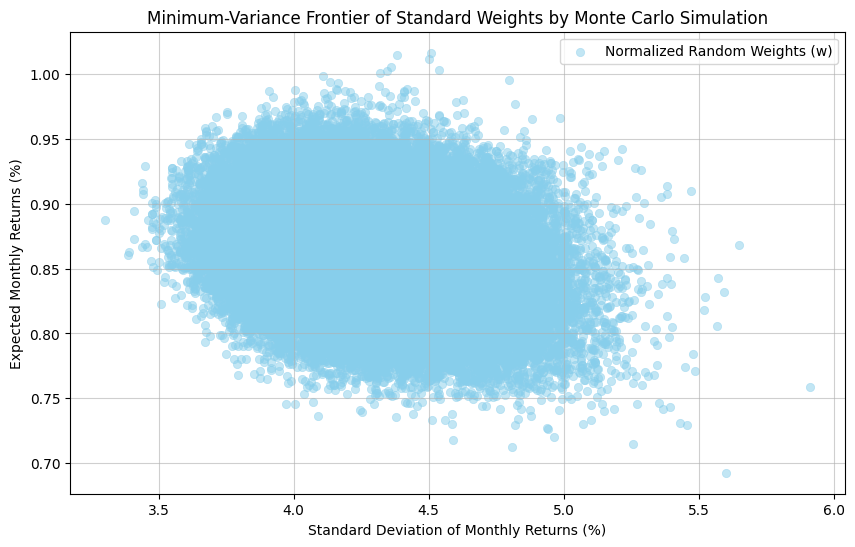

In [782]:
simulation = 100000
results = []

for i in range(simulation):

    #generate random w
    weights = np.random.uniform(0,1, size =(10,1))
    #normalize weights
    weights = weights/weights.sum()

    portfolio_returns = np.dot(weights.T, industry_df.mean()).item()
    portfolio_variance = np.dot(weights.T, np.dot(industry_df.cov(), weights)).item()
    portfolio_std = np.sqrt(portfolio_variance).item()

    results.append((portfolio_returns, portfolio_std))

results_df = pd.DataFrame(results, columns=["Portfolio Returns", "Portfolio Std"])
display(results_df)

plt.figure(figsize=[10,6])
plt.scatter(results_df["Portfolio Std"], results_df["Portfolio Returns"], marker ='o', color = "skyblue", alpha = 0.5, label ="Normalized Random Weights (w)", linewidth = 0.5)
plt.title("Minimum-Variance Frontier of Standard Weights by Monte Carlo Simulation")
plt.xlabel("Standard Deviation of Monthly Returns (%)")
plt.ylabel("Expected Monthly Returns (%)")
plt.legend()
plt.grid(alpha=0.6)
plt.show()
    

### 5.2.2 Repeat this entire process by simulating 1/w using the standard uniform distribution ⇒ take the reciprocal of the random draw from the standard uniform distribution as the portfolio weight.

Plot the new data points (on a separate graph) with mean return on the vertical axis vs standard deviation of return on the horizontal axis.

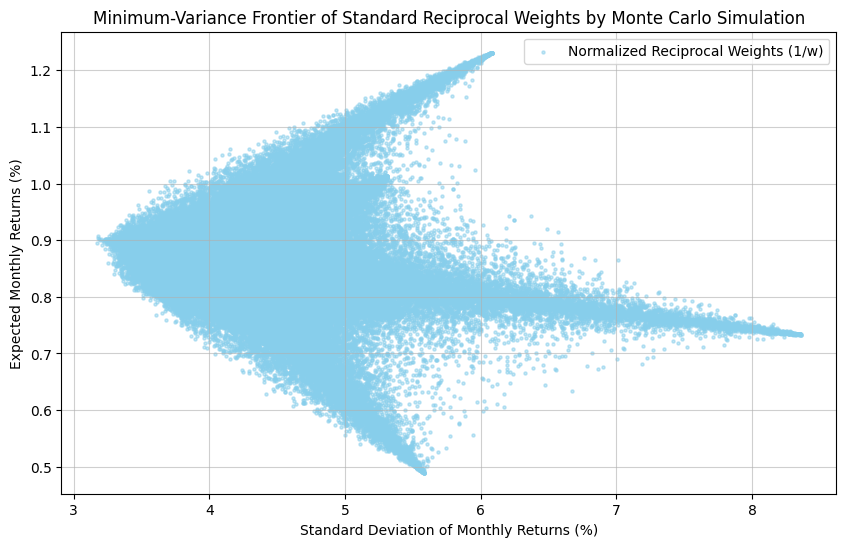

In [794]:
# Set simulation number
simulation_2 = 150000
results_2 = []

for i in range(simulation):
    # Generate random portfolio weights with size 10 x 1 with range 0 to 1
    weights = np.random.uniform(0,1,size=(10,1))
    # Use weight inverse instead
    weights_inv = 1/weights
    # Normalize weights
    weights_inv = weights_inv/np.sum(weights_inv)

    #Calculate portfolio returns and standard deviation
    portfolio_returns = np.dot(weights_inv.T, industry_df.mean()).item()
    portfolio_var = np.dot(weights_inv.T, np.dot(industry_df.cov(),weights_inv)).item()
    portfolio_std = np.sqrt(portfolio_var).item()

    results_2.append((portfolio_returns, portfolio_std))

results_2 = np.array(results_2)
# Plot
plt.figure(figsize=(10,6))
plt.scatter(results_2[:,1], results_2[:, 0], marker = 'o', color="skyblue", alpha=0.5, label="Normalized Reciprocal Weights (1/w)", linewidth=1, s=5)
plt.title("Minimum-Variance Frontier of Standard Reciprocal Weights by Monte Carlo Simulation")
plt.xlabel("Standard Deviation of Monthly Returns (%)")
plt.ylabel("Expected Monthly Returns (%)")
plt.legend()
plt.grid(alpha = 0.6)
plt.show()

# <font color = green> MULTI PERIOD ASSET PRICING

Suppose that consumption growth has lognormal distribution with the possibility of rare disasters:

Here ε is a standard normal random variable, while ν is an independent random variable that has value of either zero (with probability of 98.3%) or ln(0.65) (with probability of 1.7%).

Simulate ε with (at least) 104 random draws from standard normal distribution, and simulate ν with (at least) 104 random draws from standard uniform distribution.

Use the simulated distribution of consumption growth to find the simulated distribution of the pricing kernel for power utility of consumption:

Repeat this process for values of γ in the range from 1 to 4, in increments of 0.1 (or less). (You can reuse the same simulated distribution of consumption growth for all values of γ)

In [590]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import time

import datetime as dt
import re

import plotly.express as px

### 6.1 Calculate the mean (μM) and standard deviation (σM) of pricing kernel for each value of γ, and plot the volatility ratio (σM/μM) on the vertical axis vs γ on the horizontal axis.

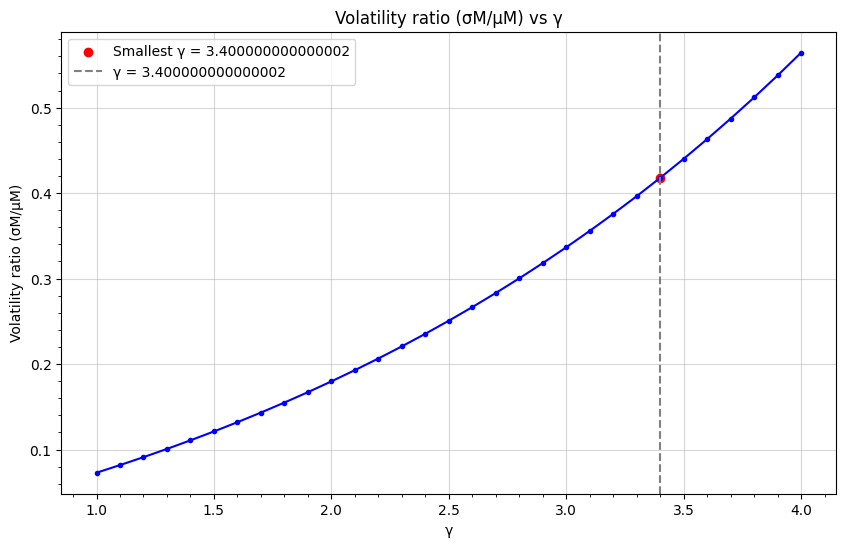

The smallest γ for which σM/μM > 0.4 is 3.400000000000002


In [601]:
# Set number of simulations : at least 10^4 simulations
simulations = 10**4

# Epsilon --> standard normal distribution
epsilon = np.random.normal(0,1, simulations)

# v (nu) --> independent random variable that has value of either 0 w/ 98.3% probability or ln(0.65) w/ 1.7%
probability_weights = [0.983, 0.017] #from the questions
nu = np.random.choice([0,np.log(0.65)], p=probability_weights, size=simulations)

# Set gamma --> from 1 to 4, increment by 0.1
gamma_values = np.arange(1, 4.1, 0.1)

# From the formula: ln(g) = 0.02 + 0.02 e + v
mu_c = 0.02
sigma_c = 0.02
ln_g = mu_c + sigma_c * epsilon + nu

mu_M_values =[]
sigma_M_values = []
sigma_over_mu = []

# Calculate σM/μM for each value of γ
for gamma in gamma_values:
    # Calculate M = delta * exp(-gamma * ln g)
    M = 0.99 * (np.exp(-gamma * ln_g))

    # Calculate the mean (μM) and standard deviation (σM) of M
    mu_M = np.mean(M)
    mu_M_values.append(mu_M)
    sigma_M = np.std(M)
    sigma_M_values.append(sigma_M)

    # Calculate σM/μM and append to the list
    sigma_over_mu.append(sigma_M / mu_M)

# Find the smallest γ for which σM/μM > 0.4
for i, gamma in enumerate(gamma_values):
    if sigma_over_mu[i] > 0.4:
        smallest_gamma = gamma
        break
    
# Plot σM/μM vs. γ
plt.figure(figsize=[10,6])

plt.plot(gamma_values, sigma_over_mu, color='blue', marker='.')
plt.scatter(smallest_gamma, sigma_over_mu[i], color='red', label=f'Smallest γ = {smallest_gamma}', marker='o')

plt.xlabel('γ')
plt.ylabel('Volatility ratio (σM/μM)')
plt.title('Volatility ratio (σM/μM) vs γ')
plt.axvline(x=smallest_gamma, color='grey', linestyle='--', label=f'γ = {smallest_gamma}')
plt.grid(alpha =0.5)
plt.minorticks_on()
plt.legend()
plt.show()


print(f"The smallest γ for which σM/μM > 0.4 is {smallest_gamma}")


### 6.2 Find the smallest value of γ (in your data) for which σM/μM > 0.4

>  smallest γ for which σM/μM > 0.4 is 3.40

### 6.3 Explain (in words, without using mathematical equations or formulas) the economic significance of this result.

#### Economic Significance:

* **H–J bound**: volatility ratio of pricing kernel must exceed `Sharpe ratio of 0.4` for US stock market

* Investor's coefficient of relative risk aversion (γ) magnifies volatility (and skewness) of consumption growth to give volatility (and skewness) of pricing kernel ⇒ H–J bound sets lower bound on γ

* Consumption growth becomes more volatile and more heavily skewed after adding rare disasters, so H–J bound is satisfied for reasonable value of γ ⇒ no equity premium puzzle

# <font color=green> BEHAVIOURAL FINANCE (HW 6)

In [117]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import time

import datetime as dt
import re

import plotly.express as px

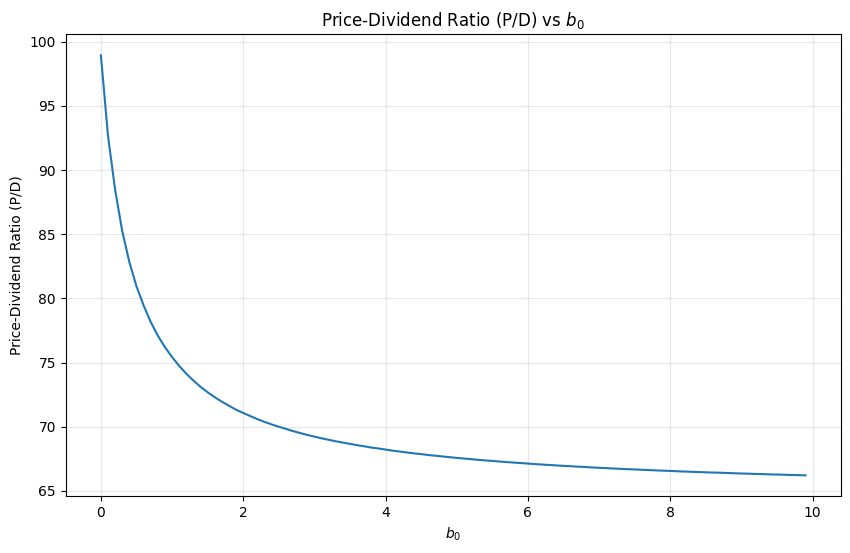

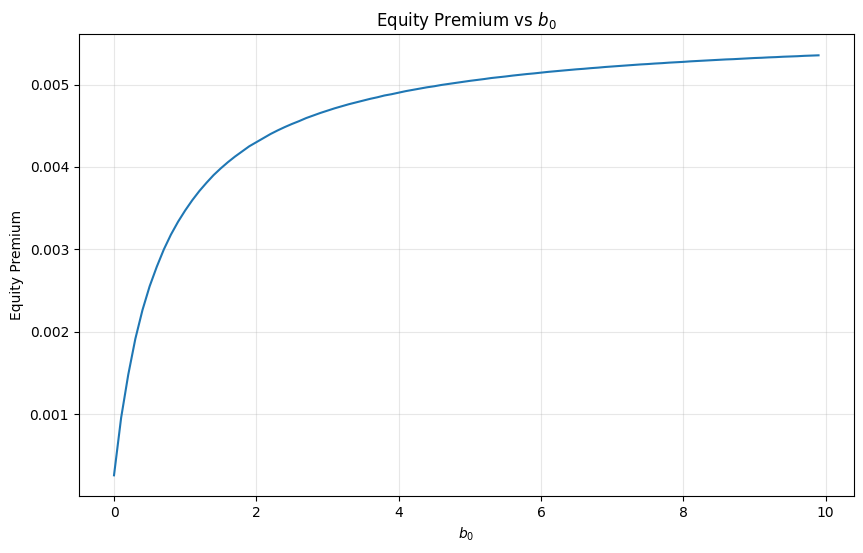

In [1260]:
#Behavioral Finance

import numpy as np
import matplotlib.pyplot as plt

# Parameters
delta = 0.99
gamma = 1
lumbda = 2
sigma = 0.02
mu = 0.02
rho = 0
Rf = np.exp(rho + gamma * mu - 0.5 * gamma**2 * sigma **2) / delta

def BF(delta, gamma, lumbda, mu, sigma, array_rf):

    # Risk Free Rate
    
    #Consumption growth function
    g = np.array([np.exp(mu + sigma * np.random.normal()) 
                for i in range (10000)])
    
    #Utility from financial gain or loss
    def nu_R(R):
        return [i - array_rf if i >= array_rf else lumbda * (i - array_rf) 
                for i in R]
    
    #Error term
    def e_term(x, b_0):
        return delta * b_0 * np.mean(nu_R(x*g)) + delta * x - 1
    
    #Bisection search
    b_0 = np.arange(0, 10, 0.1)
    x_values = []
    def x_term(x_neg, x_pos, b_0):
        x = 0.5 * (x_neg + x_pos)
        if np.abs(e_term(x, b_0)) < 10**(-5):
            x_values.append(x)
        elif e_term(x, b_0) < 0:
            x_term(x, x_pos, b_0)
        elif e_term(x, b_0) > 0:
            x_term(x_neg, x, b_0)
    
    for i in b_0:
        x_term(1, 1.1, i)
    
    #Price-Dividend ratio
    n = len(x_values)
    pd_ratio = [1 / (x_values[i] - 1) for i in range(n)]
    plt.figure(figsize=(10,6))
    plt.plot(b_0, pd_ratio)
    plt.xlabel('$b_0$')
    plt.ylabel('Price-Dividend Ratio (P/D)')
    plt.title("Price-Dividend Ratio (P/D) vs $b_0$")
    plt.grid(alpha=0.3)
    plt.show()
    
    #Expected market return
    market_return = np.array([np.mean(x_values[i] * g) for i in range(n)])
    equity_premium = market_return - array_rf
    
    plt.figure(figsize=(10,6))
    plt.plot(b_0, equity_premium)
    plt.xlabel('$b_0$')
    plt.ylabel('Equity Premium')
    plt.title("Equity Premium vs $b_0$")
    plt.grid(alpha=0.3)
    plt.show()

    # return pd_ratio, equity_premium

# run the function
BF(delta, gamma, lumbda, mu, sigma, Rf)

### 8.3 main characteristics of v(∙) as well as economic significance and implications of b0 and λ.

**Economic significance:**

* v(∙) measures utility from recent financial gain or loss in accordance with prospect theory, where financial gain or loss is measured relative to reference level based on risk-free rate

* Investor is more sensitive to financial loss, where λ determines degree of loss aversion: λ = 1 ⇒ no loss aversion, while bigger λ ⇒ more loss aversion

* b0 determines extent to which utility from recent financial gain or loss contributes to investor's total lifetime utility: b0 = 0 ⇒ no contribution, while bigger b0 ⇒ more contribution

# <font color=green> STATE PRICES

In [105]:
# Given data
Rf = 1.1
initial_share_A = 45
initial_share_B = 45

# 3 states, 2 stocks
state = ["Probability", "Stock_A", "Stock_B"]
good = [0.3 , 75, 60]
normal = [0.5, 55, 50]
bad = [0.2, 20 , 40]

df = pd.DataFrame({'state':state, "good":good, 'normal':normal, 'bad':bad}).set_index('state')

In [106]:
vector = np.array([1/Rf, initial_share_A, initial_price_B])

In [107]:
matrix = np.array([
    [1, 75, 60],
    [1, 55, 50],
    [1, 20, 40]
])

matrix

array([[ 1, 75, 60],
       [ 1, 55, 50],
       [ 1, 20, 40]])

In [108]:
state_price_list = []

inverse_matrix = np.linalg.inv(matrix)
inverse_matrix

array([[-8.        , 12.        , -3.        ],
       [-0.06666667,  0.13333333, -0.06666667],
       [ 0.23333333, -0.36666667,  0.13333333]])

In [109]:
state_price = np.dot(vector, inverse_matrix)
print("State Price:", state_price)
state_price_list.append(state_price)

State Price: [0.22727273 0.40909091 0.27272727]


In [110]:
risk_neutral_probabilities = Rf * state_price

strike = 100

final_payoff_list =[]

for state in df.columns:
    final_payoff = max(df.loc['Stock A':, state].sum() - strike, 0)
    final_payoff_list.append(final_payoff)

final_payoff_list

[35.0, 5.0, 0]

In [111]:
initial_price_for_option = np.dot(state_price, final_payoff_list)
initial_price_for_option

10.000000000000027